In [2]:
import pandas as pd
import os
import time

In [3]:
x = pd.read_csv("/home/a_medjaed/projet/Paleosaurus_ISTEX.csv")
x

,title,authors,source,publication_year,abstract,publication_month,publication_day
0,Endemism and heterochroneity in the Late Creta...,Rosemary A. Askin,Origins and Evolution of the Antarctic Biota,1989,Late Cretaceous (Campanian) to Paleocene nears...,1,1
1,Late Cretaceous-early Tertiary floras of King ...,K. Birkenmajer <sup>1</sup> ; E. Zastawniak <s...,Origins and Evolution of the Antarctic Biota,1989,Stratigraphic positions of Late Cretaceous and...,1,1
2,Origin and assembly of the Tethyside orogenic ...,A. M. C. Şengör <sup>1</sup> ; A. M. C. Şengör...,Gondwana and Tethys,1988,The Tethysides are a superorogenic complex fla...,1,1
3,East African Rift stromatolites,J. Casanova,Sedimentation in the African Rifts,1986,The East African Rift System contains many lac...,1,1
4,Anoxic-oxic cyclical lacustrine sedimentation ...,P. Anadón <sup>1</sup> ; L. Cabrera <sup>2</su...,Lacustrine Petroleum Source Rocks,1988,The Rubielos de Mora Basin is a Miocene half-g...,1,1
...,...,...,...,...,...,...,...
7241,Erratum to “The Posidonia Shale (Lower Toarcia...,"Hans-Joachim Röhl <sup>1,2</sup> ; Annette Sch...","Palaeogeography, Palaeoclimatology, Palaeoecology",2001,NaN,1,1
7242,Erratum to: “Vegetation and climate history si...,Hikaru Takahara <sup>1</sup> ; Hiroyuki Kitaga...,"Palaeogeography, Palaeoclimatology, Palaeoecology",2000,NaN,1,1
7243,Paleoclimate deduced from some early Jurassic ...,Arieh Singer <sup>1</sup> ; Moshe Wieder <sup>...,"Palaeogeography, Palaeoclimatology, Palaeoecology",1994,"Earthy red layers, intercalated amid basalt fl...",1,1
7244,Erratum to “Thermoluminescence dating tests of...,S. Balescu <sup>1</sup> ; B. Dumas <sup>2</sup...,"Palaeogeography, Palaeoclimatology, Palaeoecology",1997,NaN,1,1


In [18]:
data2 = pd.read_csv("/home/a_medjaed/projet/Promptunning/paleosaurus_TS_all.tsv", sep='\t')
data = pd.read_csv("theses_eng.tsv", sep='\t')
data.head()

,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isGraph,isDeriv,isPref,isSyntag,isMorph,isSem,isDistrib,semSim,isDico,semScore
0,1,T,1,1.0,248,0.85,0.0,4.39,601,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,T,2,NaN,223,0.42,0.0,4.08,298,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,V[s],14467,NaN,2,0.00,0.0,1.79,3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2,V[s],3389,NaN,4,0.01,0.0,2.21,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
4,3,T,3,1.0,772,2.45,0.0,4.00,1734,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dx = data[["key", "dFreq", "spec","freq","iFreq","ind","tfIdf","swtSize"]]
dx.head()

,key,dFreq,spec,freq,iFreq,ind,tfIdf,swtSize
0,n: estimator,248,4.39,601,83,0.14,2.42,1
1,npn: part of thesis,223,4.08,298,266,0.89,1.34,2
2,npan: part of phd thesis,2,1.79,3,3,1.00,1.50,3
3,anpn: main part of thesis,4,2.21,4,3,0.75,1.00,3
4,n: algorithm,772,4.00,1734,538,0.31,2.25,1


In [5]:
print(len(data.columns))
print(len(data2.columns))
data.columns

52
52


Index(['#', 'type', 'rank', 'isSwt', 'dFreq', 'fNorm', 'gfNorm', 'spec',
       'freq', 'ortho', 'iFreq', 'ind', 'pilot', 'lemma', 'tfIdf', 'specIdf',
       'key', 'pattern', 'rule', 'isFixedExp', 'swtSize', 'isFiltered',
       'depth', 'vRank', 'vRules', 'derivType', 'graphSim', 'vScore',
       'affGain', 'affSpec', 'affRatio', 'affScore', 'nAffScore', 'affOrtho',
       'extScore', 'nExtScore', 'hasExtAffix', 'isExt', 'vBagFreq', 'srcGain',
       'nSrcGain', 'isInfered', 'isGraph', 'isDeriv', 'isPref', 'isSyntag',
       'isMorph', 'isSem', 'isDistrib', 'semSim', 'isDico', 'semScore'],
      dtype='object')

In [6]:
print(len(data["key"].to_list()))
print(len(data2["key"].to_list()))

24257
63826


In [7]:
#gathering dataset and terms from Paleoclim

gt = pd.read_csv("../Paleoclim.csv", sep=";", on_bad_lines='skip')
gt2 = gt[["prefLabel_en","altLabel_en","hiddenLabel_en"]]

hidden = gt2[["hiddenLabel_en"]]

alternative = gt2[["altLabel_en"]]

prefered = gt2["prefLabel_en"]

import re

gold = []
gold.extend(prefered)

for text in hidden["hiddenLabel_en"] :
    x = re.split("§§", str(text))
    if x != ["nan"] :
        
        gold.extend(x)

for text in alternative["altLabel_en"] :
    x = re.split("§§", str(text))
    if x != ["nan"] :
    
        gold.extend(x)

print(len(gold))
paleogold=pd.DataFrame(gold)
paleogold.to_csv("paleo_gold_terms.csv",sep=";")


#gathering dataset and terms from maths
gt = pd.read_csv("Maths_v_2.csv", sep=";", on_bad_lines='skip')
gold.extend(gt["prefLabel_en"].to_list())

#print(pref)
print(gold)
print(len(gold))

3406
['geographical parameter', 'study method', 'climatic parameter', 'controlling factor', 'oceanic parameter', 'time phenomenon', 'tectonic structure', 'atmospherical parameter', 'astronomical parameter', 'climate', 'natural phenomenon', 'physical property', 'scientific discipline', 'natural environment', 'biological object', 'study material', 'biological parameter', 'structural parameter', 'geomorphological structure', 'chemical process', 'glaciary formation', 'government agency', 'constituent of the planet Earth', 'observation data', 'geographical area', 'chemical property', 'physical phenomenon', 'time parameter', 'geological parameter', 'equipment', 'hydrographic parameter', 'living organism', 'unit of measurement', 'geologic time scale', 'aphelion', 'azimuth', 'orbital configuration', 'declination', 'ellipse', 'orbital frequency', 'obliquity', 'perihelion', 'precession', 'solstice', 'eccentricity', 'atmospheric heat', 'atmospheric pressure', 'air pressure', 'atmospheric pCO2', '

In [8]:
gt_m = pd.read_csv("Maths_v_2.csv", sep=";", on_bad_lines='skip')
gold_m =[]
gold_m.extend(gt["prefLabel_en"].to_list())
print(gold_m)
print(len(gold_m))

['category theory', 'topology', 'number', 'graph theory', 'mathematical analysis', 'algebra', 'geometry', 'set theory', 'mathematical logic', 'mathematical statistics', 'probability theory', 'optimization', 'mathematical physics', 'commutative algebra', 'group theory', 'linear algebra', 'multilinear algebra', 'combinatorics', 'abstract algebra', 'representation theory', 'elementary algebra', 'fundamental theorem of algebra', 'polynomial', 'topological algebra', 'field', 'field extension', 'differential algebra', 'affine geometry', 'algebraic geometry', 'analytic geometry', 'differential geometry', 'projective geometry', 'Euclidean geometry', 'discrete geometry', 'non-Euclidean geometry', 'spherical geometry', 'descriptive geometry', 'geometric figure', 'configuration', 'complex geometry', 'topological space', 'pseudo-Euclidean space', 'convex analysis', 'geometric drawing', 'geometric transformation', 'absolute geometry', 'four-dimensional space', 'principal axis theorem', 'calculus', 

##### data processing

In [9]:
seuil = 1

data = pd.DataFrame([row for i,row in data.iterrows() if row["freq"]>seuil ])
data2 = pd.DataFrame([row for i,row in data2.iterrows() if row["freq"]>seuil ])

df = pd.concat([data, data2], ignore_index=True)
df

,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isGraph,isDeriv,isPref,isSyntag,isMorph,isSem,isDistrib,semSim,isDico,semScore
0,1,T,1,1.0,248,0.85,0.00,4.39,601,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,T,2,NaN,223,0.42,0.00,4.08,298,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,V[s],14467,NaN,2,0.00,0.00,1.79,3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2,V[s],3389,NaN,4,0.01,0.00,2.21,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
4,3,T,3,1.0,772,2.45,0.00,4.00,1734,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78216,54519,T,54519,1.0,6,0.00,0.79,0.00,8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78217,54520,T,54520,1.0,5,0.00,0.50,0.00,5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78218,54522,T,54522,1.0,4,0.00,0.46,0.00,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78219,54524,T,54524,1.0,2,0.00,0.52,0.00,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import re

terms = df[["key"]]
splited_terms = []
splited_pos = []

for t in terms["key"] :
    splitrez=re.split(": ", t)
    splited_pos.append(splitrez[0])
    splited_terms.append(splitrez[1])

df["key_processed"]=splited_terms
df["key_processed"]

df["pos"]=splited_pos

In [11]:
df["in_gold"] = df["key_processed"].isin(gold).astype(int)

isingold = df["in_gold"].to_list()
print(len([tx for tx in isingold if tx ==1]))

1890


#### Exploring data

In [14]:
"""ldf_type=df["type"].to_list()
ldf_type_set = set(ldf_type)
#ldf_type_set

#print(df['type'].value_counts())
'''df2 = pd.get_dummies(df, columns=['type'], drop_first=True)
df2'''

'''freq = df['type'].value_counts(normalize=True)
df['typeEnc'] = df['type'].map(freq)
df'''
"""
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['typeEnc'] = encoder.fit_transform(df[['type']])
#encoder.categories_

df['posEnc'] = encoder.fit_transform(df[['pos']])
df


,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isSem,isDistrib,semSim,isDico,semScore,key_processed,pos,in_gold,typeEnc,posEnc
0,1,T,1,1.0,248,0.85,0.00,4.39,601,1.0,...,NaN,NaN,NaN,NaN,NaN,estimator,n,0,0.0,16.0
1,2,T,2,NaN,223,0.42,0.00,4.08,298,1.0,...,NaN,NaN,NaN,NaN,NaN,part of thesis,npn,0,0.0,30.0
2,2,V[s],14467,NaN,2,0.00,0.00,1.79,3,1.0,...,0.0,NaN,NaN,NaN,NaN,part of phd thesis,npan,0,23.0,29.0
3,2,V[s],3389,NaN,4,0.01,0.00,2.21,4,1.0,...,0.0,NaN,NaN,NaN,NaN,main part of thesis,anpn,0,23.0,14.0
4,3,T,3,1.0,772,2.45,0.00,4.00,1734,1.0,...,NaN,NaN,NaN,NaN,NaN,algorithm,n,0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78216,54519,T,54519,1.0,6,0.00,0.79,0.00,8,1.0,...,NaN,NaN,NaN,NaN,NaN,company,n,0,0.0,16.0
78217,54520,T,54520,1.0,5,0.00,0.50,0.00,5,1.0,...,NaN,NaN,NaN,NaN,NaN,night,n,0,0.0,16.0
78218,54522,T,54522,1.0,4,0.00,0.46,0.00,4,1.0,...,NaN,NaN,NaN,NaN,NaN,player,n,0,0.0,16.0
78219,54524,T,54524,1.0,2,0.00,0.52,0.00,4,1.0,...,NaN,NaN,NaN,NaN,NaN,woman,n,0,0.0,16.0


In [15]:
gold_data=pd.DataFrame([row for i,row in df.iterrows() if row["in_gold"]==1 ])

ng_data=pd.DataFrame([row for i,row in df.iterrows() if row["in_gold"]==0 ])

print (len(gold_data),len(ng_data))

1890 76331


In [70]:
# Comparing mean in each group

# dFreq
gold_dFreq=gold_data["freq"].mean()
ng_dFreq=ng_data["freq"].mean()

print (f"dFreq gold/nogold = {gold_dFreq}/{ng_dFreq}. As expected, high frequency = more likely gold")

dFreq gold/nogold = 68.02751322751323/10.550601983466743. As expected, high frequency = more likely gold


In [71]:
g_means = {}
ng_means = {}

for g_col, ng_col in zip(gold_data,ng_data) :
    try :
        g_means[g_col]=gold_data[g_col].mean()
        ng_means[ng_col]=ng_data[ng_col].mean()
    except Exception as final_e :
        print("Error : ", final_e)
        print(g_col)

print(g_means)
print(ng_means)

Error :  Could not convert string 'TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]TTTTTTTTTTTTTTTTV[s]TTTTTTTTTTTTTTTTTTTTTTTTTV[p]TTTTTTTTTTTTTTTTTTTTTTTTV[s]V[s]V[s]V[s]TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]TTTTTTTTTTTTTTTTTTTV[s]TTV[s]+TTTTTTTTTTV[s]+TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]+TTTTTV[s]+V[s]+TTTTTTTTV[s]TTTTTTTTTTTTV[p]TTTTTTTTTTTTTTV[s]+TTV[mg]TTTTTTV[mg]TTTTTTTTV[mg]+TV[mg]V[mg]+V[s]+V[m]TTV[mg]+TTV[img]TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]V[s]V[s]TTTTTTTTV[p]+V[s]+V[s]TTTTV[p]+TTTTV[s]TTTTTTTTTV[s]TTV[s]+TTTTTTTTTTV[s]TTTTTTTTTTTTTV[p]TTTTTTV[s]TTTTTTTTTTTTTTTTTTTTTV[s]TTTTTTTTTV[s]TV[s]TTTTTTTTTTTV[s]+V[s]V[s]TTTTTTTTTTTTTTTTTTTTTTTTV[s]+TTTTV[p]+TTTTTTTTTTTTTTTV[s]TTTTTV[p]+TTTV[s]TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[mg]+TTTTTTV[s]TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTV[s]+TTTTTTTTTTTTV[m]TTTTTTTTTTTTTTTTTTTTTTV[p]TTTTTTV[s]TTTV[s]TTTTV[s]+TTTTTTTTTTTTTTTTV[gd

In [72]:
mean_comparaison=pd.DataFrame([g_means,ng_means])
mean_comparaison=mean_comparaison.drop(columns=["#","rank","isSem","isDistrib","semSim","isDico","semScore","specIdf","isFixedExp","isFiltered","derivType"])
mean_comparaison

,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,iFreq,ind,tfIdf,...,nSrcGain,isInfered,isGraph,isDeriv,isPref,isSyntag,isMorph,in_gold,typeEnc,posEnc
0,1.0,40.173016,0.04455,0.004148,2.137317,68.027513,0.998497,20.575132,0.419709,1.563392,...,0.924074,0.078704,0.305556,0.018519,0.060185,0.509259,0.407407,1.0,2.365608,14.557672
1,1.0,7.096003,0.00696,0.001912,1.666665,10.550602,0.989570,4.805728,0.684701,1.657781,...,0.759075,0.029923,0.054903,0.006620,0.019772,0.868920,0.094271,0.0,3.269039,15.033591


In [73]:
for col in mean_comparaison :
    mean = mean_comparaison[col].mean()
    std = mean_comparaison[col].std()

    print (col, " | mean : ", mean, "/ std : ", std, "/ co_var : ", (std/mean))

    # Possible labels (>25%) : dFreq, fNorm, gfNorm, freq, vRank, affScore, isExt, vBagFreq, srcGain, isGraph, isDeriv, isPref, isSyntag, isMorph

isSwt  | mean :  1.0 / std :  0.0 / co_var :  0.0
dFreq  | mean :  23.634509403801694 / std :  23.388980150157856 / co_var :  0.9896114089169821
fNorm  | mean :  0.02575491113300129 / std :  0.02658064371228919 / co_var :  1.0320611698104383
gfNorm  | mean :  0.003030173168806228 / std :  0.0015810553781791248 / co_var :  0.5217706349112714
spec  | mean :  1.9019911901029205 / std :  0.33280160292007754 / co_var :  0.17497536510779998
freq  | mean :  39.28905760548999 / std :  40.64231370232259 / co_var :  1.0344435875866747
ortho  | mean :  0.9940336270069668 / std :  0.006312663955643909 / co_var :  0.006350553727896838
iFreq  | mean :  12.690429980565705 / std :  11.150652920250305 / co_var :  0.8786662813889337
ind  | mean :  0.5522051805631544 / std :  0.18737790299765883 / co_var :  0.3393265937971925
tfIdf  | mean :  1.6105862572980847 / std :  0.06674341720688338 / co_var :  0.04144044872135688
swtSize  | mean :  1.923202909993991 / std :  0.3440905059509275 / co_var :  0.17891

In [58]:
'''dFreq, fNorm, gfNorm, freq, vRank, affScore, isExt, vBagFreq, srcGain, isGraph, isDeriv, isPref, isSyntag, isMorph

documentFrequency, dFreq [Integer]
The number of documents in corpus in which the term is occurring.

frequencyNorm, fNorm [Double]
The number of occurrences of the term in the corpus every 1000 words.

generalFrequencyNorm, gfNorm [Double]
The number of occurrences of the term in the general language corpus every 1000 words.

frequency, freq [Integer]
The number of occurrences of the term in the corpus.

VariationRank, vRank [Integer]
The rank of the variation among all variations starting from the same source term, when the relation is a variation

AffixScore, affScore [Double]
When the relation is a variation of type “extension”, the weighted average of {When the relation is a variation of type “extension”, the FREQUENCY of the variant divided by the FREQUENCY of the affix term} and {When the relation is a variation of type “extension”, the FREQUENCY of the affix term divided by the FREQUENCY of the base term.}.

SourceGain, srcGain [Double]
When the relation is a variation, the log10 of {When the relation is a variation, the total of number of occurrences of the variant term and of variant’s variant terms (order-2 variants).} divided by the FREQUENCY of the base term.

IsGraphical, isGraph [Boolean]
When the relation is a variation, wether there is a graphical similarity between the two terms.

IsDerivation, isDeriv [Boolean]
When the relation is a variation, wether one term is the derivation of the other.

IsPrefixation, isPref [Boolean]
When the relation is a variation, wether one term is the prefix of the other.

IsSyntagmatic, isSyntag [Boolean]
When the relation is a variation, wether it is a syntagmatic variation.

IsSemantic, isSem [Boolean]
When the relation is a variation, wether there is a semantic similarity between the two terms.
'''

'dFreq, fNorm, gfNorm, freq, vRank, affScore, isExt, vBagFreq, srcGain, isGraph, isDeriv, isPref, isSyntag, isMorph\n\ndocumentFrequency, dFreq [Integer]\nThe number of documents in corpus in which the term is occurring.\n\nfrequencyNorm, fNorm [Double]\nThe number of occurrences of the term in the corpus every 1000 words.\n\ngeneralFrequencyNorm, gfNorm [Double]\nThe number of occurrences of the term in the general language corpus every 1000 words.\n\nfrequency, freq [Integer]\nThe number of occurrences of the term in the corpus.\n\nVariationRank, vRank [Integer]\nThe rank of the variation among all variations starting from the same source term, when the relation is a variation\n\nAffixScore, affScore [Double]\nWhen the relation is a variation of type “extension”, the weighted average of {When the relation is a variation of type “extension”, the FREQUENCY of the variant divided by the FREQUENCY of the affix term} and {When the relation is a variation of type “extension”, the FREQUENCY

In [17]:
data_stat = df.drop(columns=["#","rank","isSem","isDistrib","semSim","isDico","semScore","specIdf","isFixedExp","isFiltered","derivType","type","pilot","lemma","pattern", "rule", "vRules","pos"])
# data_stat.head()

for c in df.columns :
    print(c, " : " ,df[c][0])

#  :  1
type  :  T
rank  :  1
isSwt  :  1.0
dFreq  :  248
fNorm  :  0.85
gfNorm  :  0.0
spec  :  4.39
freq  :  601
ortho  :  1.0
iFreq  :  83
ind  :  0.14
pilot  :  estimator
lemma  :  estimator
tfIdf  :  2.42
specIdf  :  nan
key  :  n: estimator
pattern  :  N
rule  :  n
isFixedExp  :  nan
swtSize  :  1
isFiltered  :  nan
depth  :  1.0
vRank  :  nan
vRules  :  nan
derivType  :  nan
graphSim  :  nan
vScore  :  nan
affGain  :  nan
affSpec  :  nan
affRatio  :  nan
affScore  :  nan
nAffScore  :  nan
affOrtho  :  nan
extScore  :  nan
nExtScore  :  nan
hasExtAffix  :  nan
isExt  :  nan
vBagFreq  :  nan
srcGain  :  nan
nSrcGain  :  nan
isInfered  :  nan
isGraph  :  nan
isDeriv  :  nan
isPref  :  nan
isSyntag  :  nan
isMorph  :  nan
isSem  :  nan
isDistrib  :  nan
semSim  :  nan
isDico  :  nan
semScore  :  nan
key_processed  :  estimator
pos  :  n
in_gold  :  0
typeEnc  :  0.0
posEnc  :  16.0


🔎 Correlation with label:
isSwt          : nan
dFreq          : 0.097
fNorm          : 0.080
gfNorm         : 0.015
spec           : 0.143
freq           : 0.104
ortho          : 0.022
iFreq          : 0.067
ind            : -0.139
tfIdf          : -0.015
swtSize        : -0.096
depth          : -0.095
vRank          : -0.038
graphSim       : -0.023
vScore         : 0.085
affGain        : 0.026
affSpec        : 0.006
affRatio       : -0.013
affScore       : 0.019
nAffScore      : 0.024
affOrtho       : 0.007
extScore       : 0.021
nExtScore      : 0.020
hasExtAffix    : 0.028
isExt          : -0.100
vBagFreq       : 0.323
srcGain        : 0.184
nSrcGain       : 0.107
isInfered      : 0.038
isGraph        : 0.143
isDeriv        : 0.020
isPref         : 0.039
isSyntag       : -0.141
isMorph        : 0.141
typeEnc        : -0.018
posEnc         : -0.008

🌲 Random Forest importance:
isSwt          : 0.000
dFreq          : 0.129
fNorm          : 0.053
gfNorm         : 0.017
spec           :

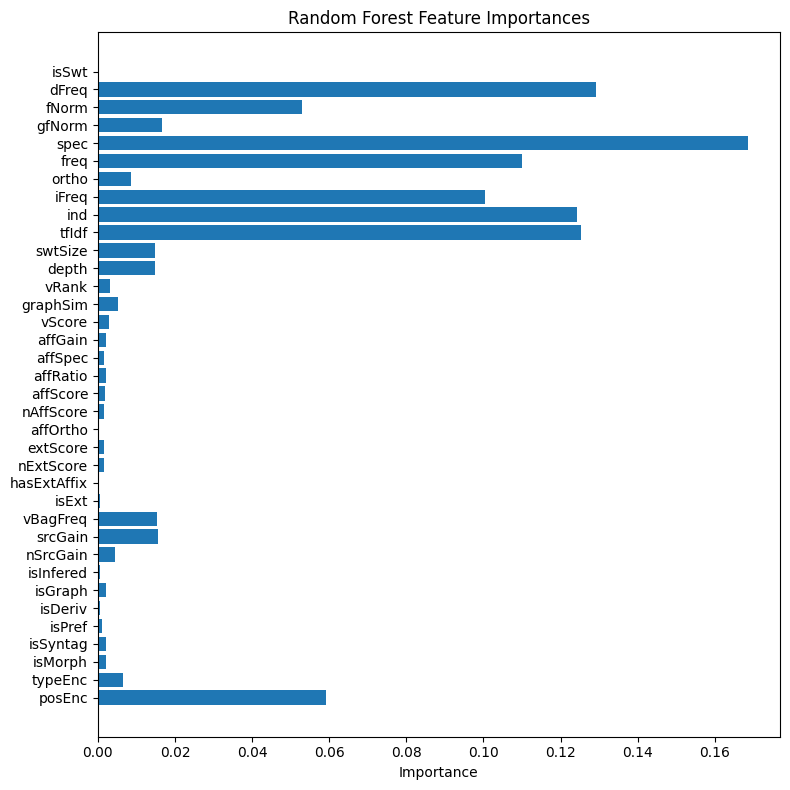

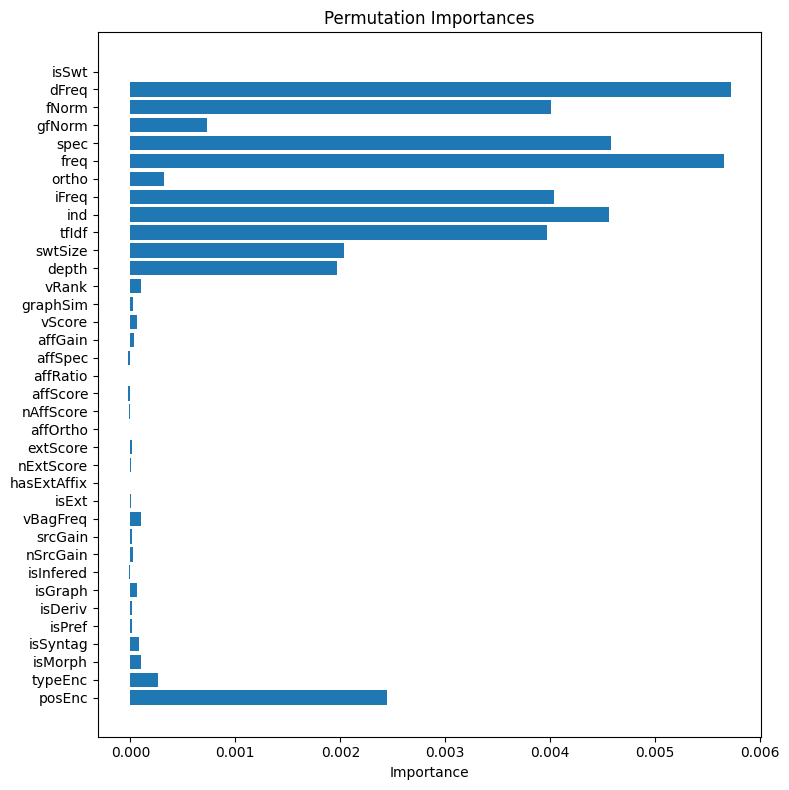

In [90]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

'''# === Example: Replace with your own data ===
df = pd.DataFrame({
    'term': ['quantum entanglement', 'asdfghjkl', 'data mining', 'xyz123'],
    'Frequency': [100, 2, 150, 1],
    'SourceGain': [1.2, 0.1, 1.5, 0.05],
    'AffixScore': [0.5, 0.9, 0.4, 1.0],
    'VariationRank': [0.8, 0.2, 0.9, 0.1],
    'label': [1, 0, 1, 0]
})'''

# === Setup ===
feature_cols = [col for col in data_stat.columns if col not in ['key', 'key_processed', 'in_gold']]
X = data_stat[feature_cols].values
y = data_stat['in_gold'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 1. Correlation with label ===
print("🔎 Correlation with label:")
for col in feature_cols:
    corr = data_stat[[col, 'in_gold']].corr().iloc[0, 1]
    print(f"{col:<15}: {corr:.3f}")

# === 2. Random Forest Feature Importance ===

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
print("\n🌲 Random Forest importance:")
for name, imp in zip(feature_cols, rf.feature_importances_):
    print(f"{name:<15}: {imp:.3f}")

# === 3. L1 Logistic Regression ===

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")  # or "median", or "most_frequent"
X_imputed = imputer.fit_transform(data_stat[feature_cols])
X_scaled = scaler.fit_transform(X_imputed)
y = data_stat['in_gold'].astype(int).values

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_scaled, y)
print("\n🔐 L1 Logistic Regression coefficients:")
for name, coef in zip(feature_cols, logreg.coef_[0]):
    print(f"{name:<15}: {coef:.3f}")

# === 4. Permutation Importance (Optional, slow for large data) ===
print("\n🔄 Permutation Importance:")
perm = permutation_importance(rf, X_scaled, y, n_repeats=10, random_state=42)
for name, imp in zip(feature_cols, perm.importances_mean):
    print(f"{name:<15}: {imp:.3f}")

# === Optional: Visual summary ===
def plot_importances(title, names, values):
    plt.figure(figsize=(8, 8))
    plt.barh(names, values)
    plt.title(title)
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_importances("Random Forest Feature Importances", feature_cols, rf.feature_importances_)
plot_importances("Permutation Importances", feature_cols, perm.importances_mean)


important features :

- dFreq, spec, freq, iFreq, ind, tfIdf

- fNorm, gfNorm, swtSize, depth, vBagFreq, srcGain

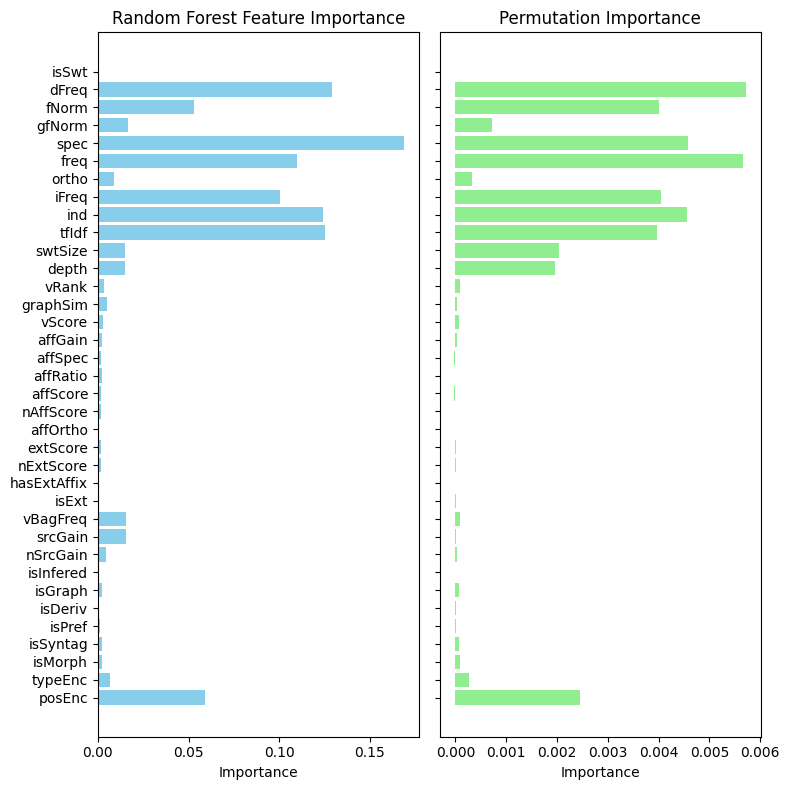

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), sharey=True)

axes[0].barh(feature_cols, rf.feature_importances_, color='skyblue')
axes[0].set_title('Random Forest Feature Importance')
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance')

axes[1].barh(feature_cols, perm.importances_mean, color='lightgreen')
axes[1].set_title('Permutation Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()


In [93]:
df.to_csv("dataset_paleo_math.csv")

## Testing classifier

### classifier version1

In [12]:
!pip install torch scikit-learn pandas sentence-transformers --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === 1. Load your data ===

dx = df[["key", "dFreq", "spec","freq","iFreq","ind","tfIdf","swtSize","in_gold"]]

text_terms = dx['key'].tolist()

numeric_features = dx[["dFreq", "spec","freq","iFreq","ind","tfIdf","swtSize"]].values
labels = dx['in_gold'].values

# === 2. Preprocess features ===
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

print(np.isnan(numeric_features_scaled).any())   # True = bad
print(np.isinf(numeric_features_scaled).any())   # True = bad

# === 3. Generate BERT embeddings ===
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

# === 4. Combine text and numeric features ===
text_tensor = text_embeddings  # shape [N, 384]
numeric_tensor = torch.tensor(numeric_features_scaled, dtype=torch.float32)  # shape [N, F]

# Final input shape: [N, 384 + F]
X = torch.cat((text_tensor, numeric_tensor), dim=1)
y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)  # [N, 1]

# === 5. Dataset & Dataloader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    '''def __getitem__(self, idx):
        return self.X[idx], self.y[idx]'''
    def __getitem__(self, idx):
        return self.X[idx].float(), self.y[idx].float()

dataset = TermDataset(X, y) #Added


# Split into train/val/test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_ds = TermDataset(X_train, y_train)
test_ds = TermDataset(X_test, y_test)

train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=8)'''

# === 6. Simple Feedforward Classifier ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = HybridClassifier(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

# === 7. Training Loop ===
for epoch in range(5):
    # === Training ===
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        preds = model(xb)
        #print(preds.min().item(), preds.max().item())  # Should be between 0 and 1
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    #print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

    # === Validation ===
    model.eval()
    total_val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in test_dl:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            total_val_loss += loss.item()
            pred_labels = (preds > 0.5).float()
            correct += (pred_labels == yb).float().sum().item()
            total += yb.size(0)

    val_accuracy = correct / total
    print(f"Epoch {epoch+1:02d} | Train Loss: {total_loss:.4f} | Val Loss: {total_val_loss:.4f} | Val Acc: {val_accuracy:.2%}")

'''# === 8. Evaluation ===
model.eval()
with torch.no_grad():
    preds = model(X_test)
    pred_labels = (preds > 0.5).float()
    acc = (pred_labels == y_test).float().mean()
    print(f"\nTest Accuracy: {acc:.2%}")
'''

False
False
Epoch 01 | Train Loss: 320.2325 | Val Loss: 55.8047 | Val Acc: 97.77%
Epoch 02 | Train Loss: 281.7613 | Val Loss: 54.2525 | Val Acc: 97.90%
Epoch 03 | Train Loss: 266.8124 | Val Loss: 55.6812 | Val Acc: 97.81%
Epoch 04 | Train Loss: 254.8708 | Val Loss: 53.2124 | Val Acc: 97.93%
Epoch 05 | Train Loss: 242.5899 | Val Loss: 53.4244 | Val Acc: 97.86%


'# === 8. Evaluation ===\nmodel.eval()\nwith torch.no_grad():\n    preds = model(X_test)\n    pred_labels = (preds > 0.5).float()\n    acc = (pred_labels == y_test).float().mean()\n    print(f"\nTest Accuracy: {acc:.2%}")\n'

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        probs = model(X_test).cpu().numpy().flatten()
        preds = (probs > 0.5).astype(int)
        y_true = y_test.cpu().numpy().flatten().astype(int)

    print("\n📊 Classification Report:")
    print(classification_report(y_true, preds, digits=3))

    print("🧮 Confusion Matrix:")
    print(confusion_matrix(y_true, preds))

    try:
        auc = roc_auc_score(y_true, probs)
        print(f"🔵 ROC AUC: {auc:.3f}")
    except ValueError:
        print("⚠️ ROC AUC couldn't be computed (possibly only one class present).")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def evaluate_model3(model3, dataloader, name="Set"):
    model3.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in dataloader:
            probs = model3(xb).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(yb.cpu().numpy().flatten())
    preds = (np.array(all_probs) > 0.5).astype(int) # THRESHOLD ?
    print(f"\n📊 Classification Report ({name}):")
    print(classification_report(all_labels, preds, digits=3))
    print("🧮 Confusion Matrix:")
    print(confusion_matrix(all_labels, preds))
    auc = roc_auc_score(all_labels, all_probs)
    print(f"🔵 ROC AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC Curve ({name})")
    plt.legend(); plt.grid(True)
    plt.show()



📊 Classification Report (Set):
              precision    recall  f1-score   support

         0.0      0.985     0.998     0.992     11472
         1.0      0.804     0.344     0.481       262

    accuracy                          0.983     11734
   macro avg      0.894     0.671     0.736     11734
weighted avg      0.981     0.983     0.980     11734

🧮 Confusion Matrix:
[[11450    22]
 [  172    90]]
🔵 ROC AUC: 0.843


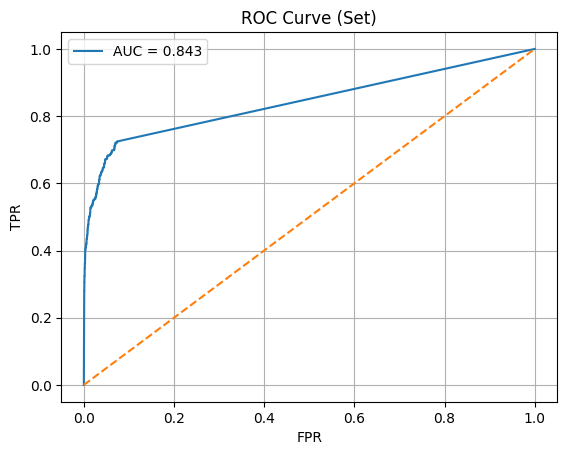

In [98]:
#evaluate_model(model, X_train, y_train)
#evaluate_model(model, X_test, y_test)
evaluate_model3(model, test_dl)

In [24]:
torch.save(model.state_dict(), "model1_p0614_r0477.pt")


### Classifier version 2

Epoch 1, Train Loss: 0.8779, Val Loss: 0.8495
Epoch 2, Train Loss: 0.7650, Val Loss: 0.7883
Epoch 3, Train Loss: 0.7021, Val Loss: 0.7906
Epoch 4, Train Loss: 0.6581, Val Loss: 0.8343
Epoch 5, Train Loss: 0.6140, Val Loss: 1.0040
Epoch 6, Train Loss: 0.5929, Val Loss: 1.0900
Epoch 7, Train Loss: 0.5459, Val Loss: 1.1187
Epoch 8, Train Loss: 0.5104, Val Loss: 0.8936
Epoch 9, Train Loss: 0.5224, Val Loss: 1.0166
Epoch 10, Train Loss: 0.4751, Val Loss: 1.0420
Epoch 11, Train Loss: 0.4113, Val Loss: 1.2239
Epoch 12, Train Loss: 0.4003, Val Loss: 1.2665
⏹️ Early stopping at epoch 12


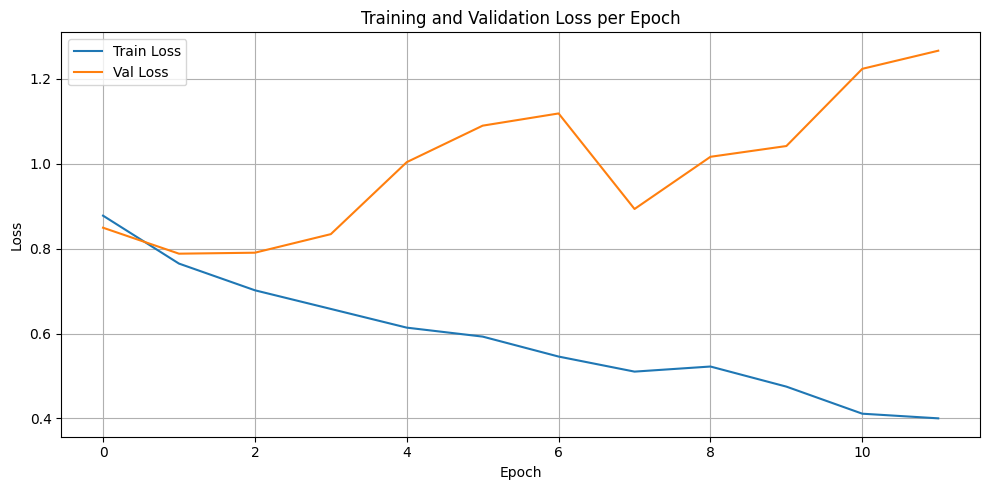

ValueError: too many values to unpack (expected 2)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, f1_score
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Load & Preprocess Data ===
dx = df[["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize","in_gold"]]
text_terms = dx['key'].tolist()
numeric_features = dx[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values
labels = dx['in_gold'].values

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

bert_model2 = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model2.encode(text_terms, convert_to_tensor=True)

text_tensor = text_embeddings
numeric_tensor = torch.tensor(numeric_features_scaled, dtype=torch.float32)
X = torch.cat((text_tensor, numeric_tensor), dim=1)
y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === Dataset & Weighted Sampler ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# First split: train (80%) + temp (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: validation (10%) from the 80%
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.125, random_state=42) # 0.125 of 80% = 10% total

train_ds = TermDataset(X_train, y_train)
val_ds = TermDataset(X_val, y_val)
test_ds = TermDataset(X_test, y_test)

y_train_np = y_train.numpy().flatten()
class_sample_count = np.bincount(y_train_np.astype(int))
weights = 1. / class_sample_count
sample_weights = weights[y_train_np.astype(int)]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=8)
test_dl = DataLoader(test_ds, batch_size=8)

# === Model ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  # No sigmoid
        )
    def forward(self, x):
        return self.net(x)

model2 = HybridClassifier(X.shape[1])
pos_weight = torch.tensor([(y_train.shape[0] - y_train.sum()) / y_train.sum()])
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)

# === Parameters ===
'''best_f1 = 0
counter = 0
best_state = None'''
num_epochs = 50
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

# === List to gather the losses
train_losses = []
val_losses = []


# === Training Loop ===
for epoch in range(num_epochs):
    model2.train()
    total_loss = 0

    for xb, yb in train_dl:
        logits = model2(xb)
        loss = loss_fn(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dl)
    train_losses.append(avg_train_loss)

    # === Validation ===
    model2.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            preds = model2(xb)
            loss = loss_fn(preds, yb)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_dl)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # === Early stopping ===
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"⏹️ Early stopping at epoch {epoch+1}")
            break


            



    '''# Eval on test set for early stopping
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test)
        val_probs = torch.sigmoid(val_logits).squeeze().numpy()
        val_true = y_test.squeeze().numpy()

    precision, recall, thresholds = precision_recall_curve(val_true, val_probs)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
    val_f1 = np.max(f1_scores)

    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Val F1: {val_f1:.4f}")
    train_losses.append(total_loss)

    if val_f1 > best_f1:
        best_f1 = val_f1
        best_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("🛑 Early stopping triggered.")
            break

# === Load Best Model ===
model.load_state_dict(best_state)

# === Final Evaluation ===
model.eval()
with torch.no_grad():
    logits = model(X_test)
    probs = torch.sigmoid(logits).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# === Optimal Threshold ===
precision, recall, thresholds = precision_recall_curve(y_true, probs)
f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n✅ Best threshold for F1: {best_threshold:.3f}")

pred_labels = (probs > best_threshold).astype(int)

# === Reports ===
print("\n🧾 Classification Report:")
print(classification_report(y_true, pred_labels, digits=3))
print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_true, pred_labels))
print(f"\n🔵 ROC AUC: {roc_auc_score(y_true, probs):.3f}")

# === Precision-Recall Curve ===
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

'''
model2.load_state_dict(torch.load("best_model.pt"))
evaluate_model(model2, X_test, y_test)
'''


📊 Classification Report:
              precision    recall  f1-score   support

           0      0.982     0.997     0.989     15279
           1      0.667     0.230     0.341       366

    accuracy                          0.979     15645
   macro avg      0.824     0.613     0.665     15645
weighted avg      0.974     0.979     0.974     15645

🧮 Confusion Matrix:
[[15237    42]
 [  282    84]]
🔵 ROC AUC: 0.920


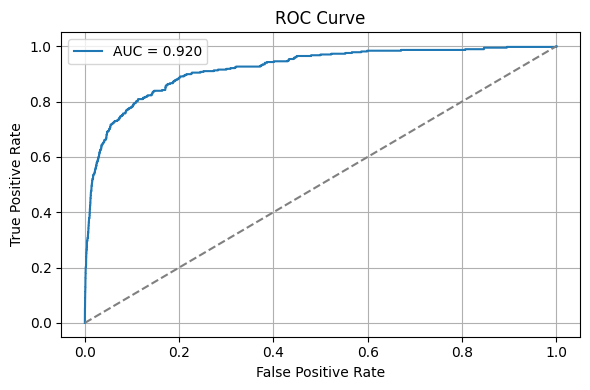

"New version doesn't seems to work with evaluation. Maybe overfitting ? Skewd towards label 1 too much ?"

In [94]:

model2.load_state_dict(torch.load("best_model.pt"))
evaluate_model(model2, X_test, y_test)
'''New version doesn't seems to work with evaluation. Maybe overfitting ? Skewd towards label 1 too much ?'''

In [ ]:
print(f"train_losses = {train_losses}")

train_losses = [9513.10111454688, 5973.373233105289, 4925.24889903306, 4132.791269830253, 3791.940317431443, 3725.7434055517733, 3331.142126509265, 3193.4441203116075, 2916.9569783648767, 2877.7931043888675, 2502.3952691716404, 2424.717380345717, 2378.459894190184, 2125.0055807263525, 2236.0244049441517, 2400.1449522261164, 1940.385268898025, 1871.9462161143842, 1851.412263847733, 1706.3920087874544, 1876.2911476397544, 2447.7393200477327, 1669.5883309515652, 1713.9357371591523, 1685.7538972512216, 1781.0370521724144, 1532.3797291120707, 1402.5118708397413, 1468.662941279478, 1498.473676193037, 1381.137597149434, 1599.968917536594, 1459.9069985964763, 1169.1556790964592, 1330.0231444568572, 1741.4158260962035, 1432.2126992460217, 1330.3564347347485, 1342.529319237351]


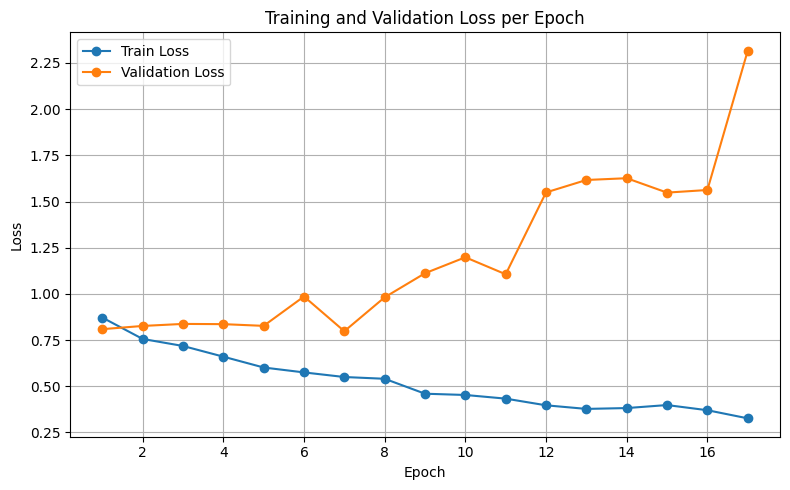

In [26]:
import matplotlib.pyplot as plt

def plot_losses(train_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Train Loss", marker='o')
    plt.plot(epochs, val_losses, label="Validation Loss", marker='o')

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss per Epoch")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_losses(train_losses)


### Classifier version 3

In [26]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets.float(), reduction='none')
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 1 | Train Loss: 532.39 | Val Loss: 104.85 | Val AUC: 0.785
Epoch 2 | Train Loss: 504.84 | Val Loss: 103.92 | Val AUC: 0.810
Epoch 3 | Train Loss: 494.07 | Val Loss: 103.37 | Val AUC: 0.817
Epoch 4 | Train Loss: 487.86 | Val Loss: 103.19 | Val AUC: 0.812
Epoch 5 | Train Loss: 481.84 | Val Loss: 102.66 | Val AUC: 0.829
Epoch 6 | Train Loss: 476.52 | Val Loss: 102.63 | Val AUC: 0.825
Epoch 7 | Train Loss: 473.23 | Val Loss: 102.24 | Val AUC: 0.829
Epoch 8 | Train Loss: 469.91 | Val Loss: 101.60 | Val AUC: 0.829
Epoch 9 | Train Loss: 466.96 | Val Loss: 101.76 | Val AUC: 0.833
Epoch 10 | Train Loss: 465.72 | Val Loss: 102.26 | Val AUC: 0.827
Epoch 11 | Train Loss: 464.37 | Val Loss: 101.88 | Val AUC: 0.820
Epoch 12 | Train Loss: 460.78 | Val Loss: 101.75 | Val AUC: 0.824
Epoch 13 | Train Loss: 459.53 | Val Loss: 102.10 | Val AUC: 0.831
Epoch 14 | Train Loss: 455.40 | Val Loss: 102.22 | Val AUC: 0.829
Epoch 15 | Train Loss: 458.15 | Val Loss: 102.18 | Val AUC: 0.823
Epoch 16 | Train Lo

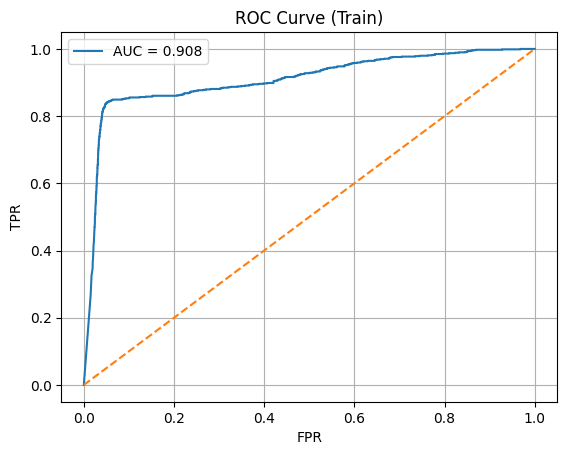


📊 Classification Report (Test):
              precision    recall  f1-score   support

         0.0      0.944     0.891     0.917      1368
         1.0      0.394     0.574     0.467       169

    accuracy                          0.856      1537
   macro avg      0.669     0.733     0.692      1537
weighted avg      0.884     0.856     0.867      1537

🧮 Confusion Matrix:
[[1219  149]
 [  72   97]]
🔵 ROC AUC: 0.832


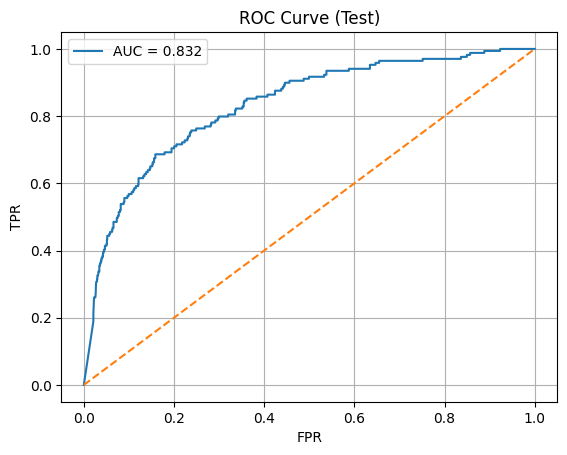

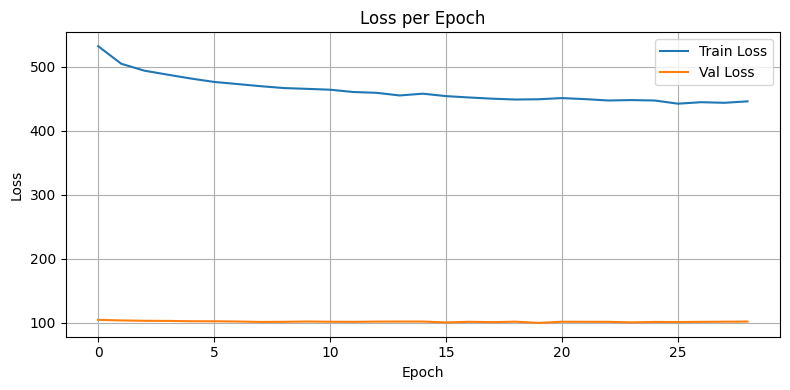

In [49]:
!pip install torch scikit-learn pandas sentence-transformers --quiet

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === 1. Prepare Data ===
df = df[["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize", "in_gold"]]

text_terms = df["key"].tolist()
numeric_features = df[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values
labels = df["in_gold"].values

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

X_tensor = torch.cat((text_embeddings, torch.tensor(numeric_features_scaled, dtype=torch.float32)), dim=1)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === 2. Dataset and DataLoader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TermDataset(X_tensor, y_tensor)

# Split into train/val/test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)

# === 3. Model ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model3 = HybridClassifier(X_tensor.shape[1])

# Weighted loss to handle imbalance
pos_weight = torch.tensor([(len(labels) - labels.sum()) / labels.sum()], dtype=torch.float32)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#loss_fn = FocalLoss(alpha=0.90, gamma=0)   # FOCAL LOSS NE MARCHE PAS. INCAPABLE DE PREDIRE LABEL 1
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)

# === 4. Training with Early Stopping ===
train_losses, val_losses, val_aucs = [], [], []
best_auc = 0
patience = 20
patience_counter = 0

for epoch in range(50):
    # --- Train ---
    model3.train()
    total_train_loss = 0
    for xb, yb in train_dl:
        logits = model3(xb)
        loss = loss_fn(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    train_losses.append(total_train_loss)

    # --- Validate ---
    model3.eval()
    all_probs, all_labels = [], []
    total_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            logits = model3(xb)
            loss = loss_fn(logits, yb)
            total_val_loss += loss.item()
            all_probs.extend(logits.sigmoid().cpu().numpy())
            all_labels.extend(yb.cpu().numpy())
    val_losses.append(total_val_loss)
    auc = roc_auc_score(all_labels, all_probs)
    val_aucs.append(auc)
    
    print(f"Epoch {epoch+1} | Train Loss: {total_train_loss:.2f} | Val Loss: {total_val_loss:.2f} | Val AUC: {auc:.3f}")

    if auc > best_auc:
        best_auc = auc
        best_model_state = model3.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

# Load best model
model3.load_state_dict(best_model_state)

# === 5. Final Evaluation ===
def evaluate_model3(model3, dataloader, name="Set"):
    model3.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in dataloader:
            probs = model3(xb).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(yb.cpu().numpy().flatten())
    preds = (np.array(all_probs) > 0.5).astype(int) # THRESHOLD ?
    print(f"\n📊 Classification Report ({name}):")
    print(classification_report(all_labels, preds, digits=3))
    print("🧮 Confusion Matrix:")
    print(confusion_matrix(all_labels, preds))
    auc = roc_auc_score(all_labels, all_probs)
    print(f"🔵 ROC AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC Curve ({name})")
    plt.legend(); plt.grid(True)
    plt.show()

evaluate_model3(model3, train_dl, name="Train")
evaluate_model3(model3, test_dl, name="Test")

# === 6. Plot Loss Curves ===
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Optimal threshold for best F1: 0.998 | F1: 0.345


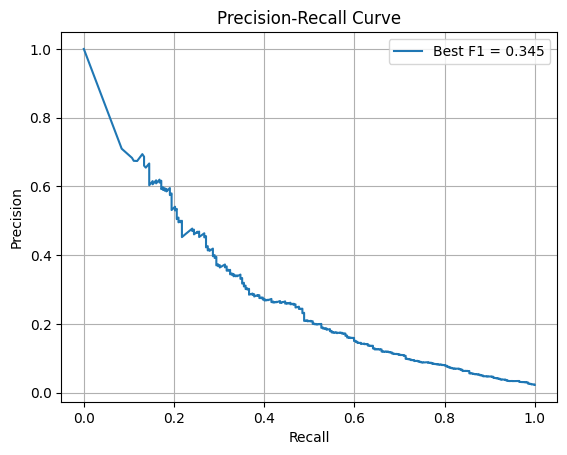


🔁 Evaluation with base threshold:
              precision    recall  f1-score   support

         0.0      0.989     0.947     0.967     11472
         1.0      0.187     0.534     0.277       262

    accuracy                          0.938     11734
   macro avg      0.588     0.741     0.622     11734
weighted avg      0.971     0.938     0.952     11734

[[10864   608]
 [  122   140]]

🔁 Evaluation with optimized threshold:
              precision    recall  f1-score   support

         0.0      0.985     0.985     0.985     11472
         1.0      0.338     0.340     0.339       262

    accuracy                          0.970     11734
   macro avg      0.662     0.662     0.662     11734
weighted avg      0.970     0.970     0.970     11734

[[11298   174]
 [  173    89]]


In [19]:
from sklearn.metrics import precision_recall_curve

model.load_state_dict(torch.load("model1_p0937_r0876_th0143.pt"))

def optimize_threshold(probs, labels):
    precisions, recalls, thresholds = precision_recall_curve(labels, probs)

    # Add one more threshold to match len(precisions)
    thresholds = np.append(thresholds, 1.0)

    f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1s)
    best_threshold = thresholds[best_idx]

    print(f"🔍 Optimal threshold for best F1: {best_threshold:.3f} | F1: {f1s[best_idx]:.3f}")
    
    # PR Curve
    plt.figure()
    plt.plot(recalls, precisions, label=f"Best F1 = {f1s[best_idx]:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.legend()
    plt.show()

    return best_threshold

# Get probs/labels from test set
model.eval()
all_probs, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        probs = model(xb).cpu().numpy().flatten()
        all_probs.extend(probs)
        all_labels.extend(yb.cpu().numpy().flatten())

# Find the best threshold
best_thresh = optimize_threshold(np.array(all_probs), np.array(all_labels))

# Re-evaluate with new threshold
preds = (np.array(all_probs) > 0.5).astype(int)
print("\n🔁 Evaluation with base threshold:")
print(classification_report(all_labels, preds, digits=3))
print(confusion_matrix(all_labels, preds))

# Re-evaluate with new threshold
preds = (np.array(all_probs) > best_thresh).astype(int)
print("\n🔁 Evaluation with optimized threshold:")
print(classification_report(all_labels, preds, digits=3))
print(confusion_matrix(all_labels, preds))


In [27]:
torch.save(model.state_dict(), "model3_p0937_r0876_th0143.pt")

### Evaluation

In [59]:
# Compute on training set
model.eval()
with torch.no_grad():
    train_preds = model(X_train)
    train_labels = (train_preds > 0.5).float()
    train_acc = (train_labels == y_train).float().mean()
    print(f"Training Accuracy: {train_acc:.2%}")

Training Accuracy: 99.06%


In [37]:
def predict_term(model, term, numeric_stats, scaler, bert_model, threshold=0.5,verbose=False):
    """
    Predict if a term is a 'concept' or 'noise' given its text and numeric stats.
    
    Args:
        model: Trained PyTorch model.
        term: str, the key term to evaluate.
        numeric_stats: dict or list of the 6 numeric features, in order:
            ["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf","swtSize"]
        scaler: Fitted StandardScaler instance.
        bert_model: SentenceTransformer instance.
        threshold: float, decision boundary.
    
    Returns:
        (probability, binary label)
    """
    model.eval()
    
    # Handle numeric input
    if isinstance(numeric_stats, dict):
        feature_order = ["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf","swtSize"]
        numeric_array = np.array([[numeric_stats[f] for f in feature_order]])
    else:
        numeric_array = np.array([numeric_stats])  # Assume list in correct order

    numeric_scaled = scaler.transform(numeric_array)
    numeric_tensor = torch.tensor(numeric_scaled, dtype=torch.float32)

    # Handle text embedding
    with torch.no_grad():
        text_embedding = bert_model.encode([term], convert_to_tensor=True)  # shape [1, 384]

    input_tensor = torch.cat((text_embedding, numeric_tensor), dim=1)  # shape [1, D]
    
    with torch.no_grad():
        prob = model(input_tensor).item()
        label = int(prob > threshold)
    
    if verbose == True :
        print(f"🔍 Term: '{term}'")
        print(f"→ Probability of being a concept: {prob:.4f}")
        print(f"→ Predicted label: {label} ({'CONCEPT' if label else 'NOISE'})")
    
    return prob, label


In [48]:
model3.load_state_dict(torch.load("model3_p0937_r0876_th0143.pt"))
print("\n✅ Best model loaded for evaluation")

RuntimeError: Error(s) in loading state_dict for HybridClassifier:
	size mismatch for net.0.weight: copying a param with shape torch.Size([128, 391]) from checkpoint, the shape in current model is torch.Size([128, 386]).

In [51]:
proba,label = predict_term(
    model3,
    term="Advanced",
    numeric_stats={
        "dFreq": 85, # 85
        "spec": 4, # 4
        "freq": 200, # 200
        "iFreq": 80, # 80
        "ind": 0.3, # 0.3
        "tfIdf": 2.5, # 2.5  / Frequency good, offset by term-number and idf
        "swtSize":1 # 1 to 3 ?
    },
    scaler=scaler,
    bert_model=bert_model,
    threshold=0.143 #depend on model, 0.5 to 0.95
)

print("\nProbability : ",proba, ". Label : ", label)


Probability :  3.212713650668775e-08 . Label :  0


In [148]:
for i,row in gold_data.iterrows() :
    print (row["key"],row["dFreq"], row["spec"],row["freq"],row["iFreq"],row["ind"],row["tfIdf"],row["swtSize"])

    if i > 5 : break

print ("######")

for i,row in ng_data.iterrows() :
    print (row["key"],row["dFreq"], row["spec"],row["freq"],row["iFreq"],row["ind"],row["tfIdf"],row["swtSize"])

    if i > 5 : break

a: polynomial 85 3.66 223 78 0.35 2.62 1
######
n: estimator 248 4.39 601 83 0.14 2.42 1
npn: part of thesis 223 4.08 298 266 0.89 1.34 2
npan: part of phd thesis 2 1.79 3 3 1.0 1.5 3
anpn: main part of thesis 4 2.21 4 3 0.75 1.0 3
n: algorithm 772 4.0 1734 538 0.31 2.25 1
n: segmentation 69 3.88 187 26 0.14 2.71 1
n: diffusion 202 3.88 372 40 0.11 1.84 1


### Pipeline (3rd puis 1rst/newfirst?)

In [34]:
# Prediction pipeline 3 puis 1

def predict_pipeline(model_rec,model_pre,term,numeric_stats, scaler, bert_model, threshold_rec=0.5,threshold_pre=0.5) :
    proba_rec,label_rec = predict_term(
        model_rec,
        term=term,
        numeric_stats=numeric_stats,
        scaler=scaler,
        bert_model=bert_model,
        threshold=threshold_rec
    )
    #print("\nProbability Rec : ",proba_rec, ". Label Rec : ", label_rec)

    if label_rec == 1 :
        #print ("### 2nd model ###")
        proba_pre,label_pre=predict_term(
            model_pre,
            term=term,
            numeric_stats=numeric_stats,
            scaler=scaler,
            bert_model=bert_model,
            threshold=threshold_pre
        )  
        return (proba_pre,label_pre)
        #print("\nProbability Pre : ",proba_pre, ". Label Pre : ", label_pre)
    else : return (proba_rec,label_rec)

In [40]:
proba,label = predict_pipeline(
    model,
    model3,
    term="group homogeneity",
    numeric_stats={
        "dFreq": 85, # 85
        "spec": 4, # 4
        "freq": 200, # 200
        "iFreq": 80, # 80
        "ind": 0.3, # 0.3
        "tfIdf": 2.5, # 2.5  / Frequency good, offset by term-number and idf
        "swtSize":1 # 1 to 3 ?
    },
    scaler=scaler,
    bert_model=bert_model,
)

print("Proba : ",proba, "Label : ", label)

Proba :  0.00028020297759212554 Label :  0


### Production/predict running

##### training, only freq and type

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model_v2(model, dataloader):
    model.eval()
    y_true = []
    y_probs = []

    with torch.no_grad():
        for xb, yb in dataloader:
            probs = model(xb).squeeze(1)  # shape: [batch]
            y_true.extend(yb.cpu().numpy().flatten())
            y_probs.extend(probs.cpu().numpy().flatten())

    y_true = np.array(y_true).astype(int)
    y_probs = np.array(y_probs)
    y_pred = (y_probs > 0.5).astype(int)

    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred, digits=3))

    print("🧮 Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    try:
        auc = roc_auc_score(y_true, y_probs)
        print(f"🔵 ROC AUC: {auc:.3f}")
    except ValueError:
        print("⚠️ ROC AUC couldn't be computed (possibly only one class present).")
        auc = 0.0

    # Optional: Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# === 1. Load the data ===

dx = pd.DataFrame([row for i,row in df.iterrows() if row["freq"]> 1 ])
dx = dx[["key", "freq","typeEnc","in_gold"]]

text_terms = dx['key'].tolist()

numeric_features = dx[["freq","typeEnc"]].values
labels = dx['in_gold'].values

# === 2. Preprocess features ===
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

print(np.isnan(numeric_features_scaled).any())   # True = bad
print(np.isinf(numeric_features_scaled).any())   # True = bad

# === 3. Generate BERT embeddings ===
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

# === 4. Combine text and numeric features ===
text_tensor = text_embeddings  # shape [N, 384]
numeric_tensor = torch.tensor(numeric_features_scaled, dtype=torch.float32)  # shape [N, F]

# Final input shape: [N, 384 + F]
X = torch.cat((text_tensor, numeric_tensor), dim=1)
y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)  # [N, 1]

# === 5. Dataset & Dataloader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    '''def __getitem__(self, idx):
        return self.X[idx], self.y[idx]'''
    def __getitem__(self, idx):
        return self.X[idx].float(), self.y[idx].float()

'''
# Create dataset
dataset = TermDataset(X, y)
'''
# Split into train/val/test
y_np = y.numpy()

# === Properly split tensors ===
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y_np, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val.numpy(), random_state=42)
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")# Sanity check: shapes

# Create dataset
train_ds = TermDataset(X_train, y_train)
val_ds = TermDataset(X_val, y_val)
test_ds = TermDataset(X_test, y_test)



'''
df_train_val, test_ds = train_test_split(dx, test_size=0.2, stratify=dx['in_gold'], random_state=42)
train_ds, val_ds = train_test_split(df_train_val, test_size=0.25, stratify=df_train_val['in_gold'], random_state=42)
'''
'''
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))
'''
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)

# === 6. Simple Feedforward Classifier ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)


#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridClassifier(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()


# = Values to keep =
losses = []
val_losses = []
val_accuracies = []
best_val_loss = float('inf')
best_model_path = "best_model1.pt"

# === 7. Training and Validation Loop ===
for epoch in range(50):
    # === Training ===
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        preds = model(xb)
        #print(preds.min().item(), preds.max().item())  # Should be between 0 and 1
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # === Validation ===
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            preds = model(xb)
            val_loss += loss_fn(preds, yb).item()
            pred_labels = (preds > 0.5).float()
            correct += (pred_labels == yb).sum().item()
            total += yb.size(0)
    avg_val_loss = val_loss / len(val_dl)
    val_acc = correct / total

    # === Save best model ===
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Epoch {epoch+1:02d} | Train Loss: {total_loss:.4f} | New best model! Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2%}")
    else:
        print(f"Epoch {epoch+1:02d} | Train Loss: {total_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.2%}")

    losses.append(total_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)


'''
# === 8. Evaluation ===
model.eval()
with torch.no_grad():
    preds = model(X_test)
    pred_labels = (preds > 0.5).float()
    acc = (pred_labels == y_test).float().mean()
    print(f"\nTest Accuracy: {acc:.2%}")
'''

# === Final Evaluation ===
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for xb, yb in test_dl:
        preds = model(xb)
        pred_labels = (preds > 0.5).float()
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(pred_labels.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
test_acc = (y_true == y_pred).mean()
print(f"\nTest Accuracy: {test_acc:.2%}")


False
False
Train: torch.Size([46932, 386]), Val: torch.Size([15644, 386]), Test: torch.Size([15645, 386])
Epoch 01 | Train Loss: 286.5722 | New best model! Val Loss: 0.0877 | Val Acc: 97.58%
Epoch 02 | Train Loss: 240.9364 | New best model! Val Loss: 0.0827 | Val Acc: 97.63%
Epoch 03 | Train Loss: 226.2867 | New best model! Val Loss: 0.0821 | Val Acc: 97.71%
Epoch 04 | Train Loss: 213.8285 | New best model! Val Loss: 0.0781 | Val Acc: 97.73%
Epoch 05 | Train Loss: 203.6084 | Val Loss: 0.0801 | Val Acc: 97.62%
Epoch 06 | Train Loss: 190.9010 | New best model! Val Loss: 0.0776 | Val Acc: 97.74%
Epoch 07 | Train Loss: 178.7800 | New best model! Val Loss: 0.0752 | Val Acc: 97.80%
Epoch 08 | Train Loss: 166.5022 | Val Loss: 0.0762 | Val Acc: 97.65%
Epoch 09 | Train Loss: 157.8452 | Val Loss: 0.0887 | Val Acc: 97.75%
Epoch 10 | Train Loss: 151.2221 | Val Loss: 0.0826 | Val Acc: 97.76%
Epoch 11 | Train Loss: 136.0431 | Val Loss: 0.0828 | Val Acc: 97.61%
Epoch 12 | Train Loss: 133.3681 | Val 


📊 Classification Report:
              precision    recall  f1-score   support

           0      0.927     0.974     0.950      1368
           1      0.646     0.379     0.478       169

    accuracy                          0.909      1537
   macro avg      0.787     0.677     0.714      1537
weighted avg      0.896     0.909     0.898      1537

🧮 Confusion Matrix:
[[1333   35]
 [ 105   64]]
🔵 ROC AUC: 0.857


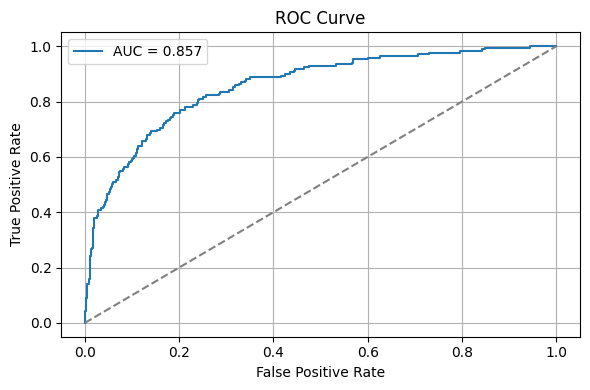

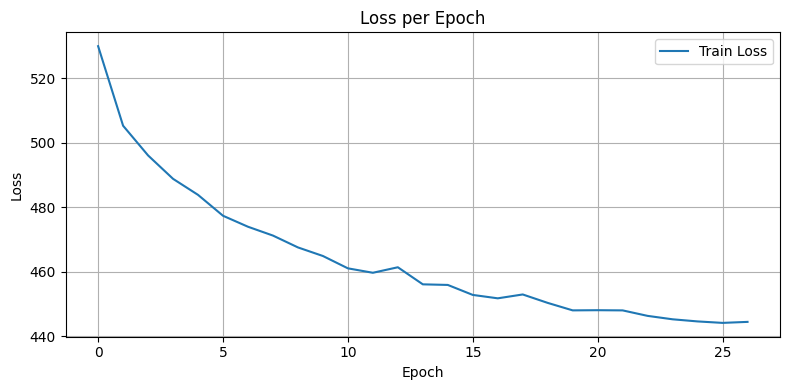

In [45]:

'''model.load_state_dict(torch.load("best_model1.pt"))
print("\n✅ Best model loaded for evaluation")'''

#evaluate_model(model, X_test, y_test)
evaluate_model_v2(model, test_dl)

# Plot Loss Curves
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1 | Train Loss: 542.77 | Val Loss: 106.13 | Val AUC: 0.795
Epoch 2 | Train Loss: 512.85 | Val Loss: 103.71 | Val AUC: 0.804
Epoch 3 | Train Loss: 497.43 | Val Loss: 102.83 | Val AUC: 0.807
Epoch 4 | Train Loss: 490.78 | Val Loss: 102.80 | Val AUC: 0.809
Epoch 5 | Train Loss: 486.23 | Val Loss: 103.00 | Val AUC: 0.803
Epoch 6 | Train Loss: 482.17 | Val Loss: 101.91 | Val AUC: 0.815
Epoch 7 | Train Loss: 476.66 | Val Loss: 102.32 | Val AUC: 0.813
Epoch 8 | Train Loss: 475.60 | Val Loss: 101.83 | Val AUC: 0.818
Epoch 9 | Train Loss: 471.51 | Val Loss: 102.30 | Val AUC: 0.815
Epoch 10 | Train Loss: 467.14 | Val Loss: 101.77 | Val AUC: 0.816
Epoch 11 | Train Loss: 469.04 | Val Loss: 102.00 | Val AUC: 0.815
Epoch 12 | Train Loss: 465.32 | Val Loss: 101.42 | Val AUC: 0.822
Epoch 13 | Train Loss: 462.08 | Val Loss: 101.55 | Val AUC: 0.818
Epoch 14 | Train Loss: 460.18 | Val Loss: 101.95 | Val AUC: 0.807
Epoch 15 | Train Loss: 460.30 | Val Loss: 101.76 | Val AUC: 0.811
Epoch 16 | Train Lo

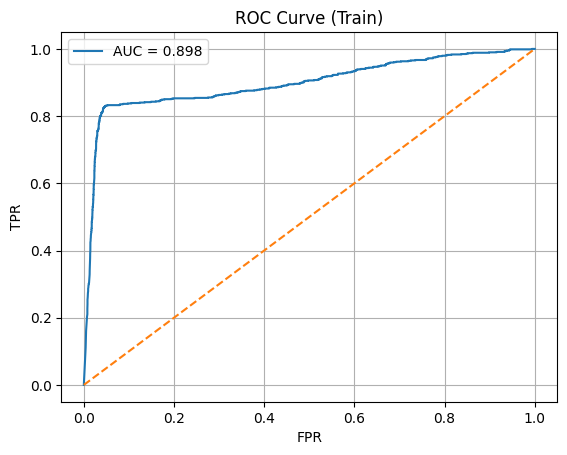


📊 Classification Report (Test):
              precision    recall  f1-score   support

         0.0      0.946     0.917     0.931      1368
         1.0      0.462     0.580     0.514       169

    accuracy                          0.880      1537
   macro avg      0.704     0.748     0.723      1537
weighted avg      0.893     0.880     0.885      1537

🧮 Confusion Matrix:
[[1254  114]
 [  71   98]]
🔵 ROC AUC: 0.828


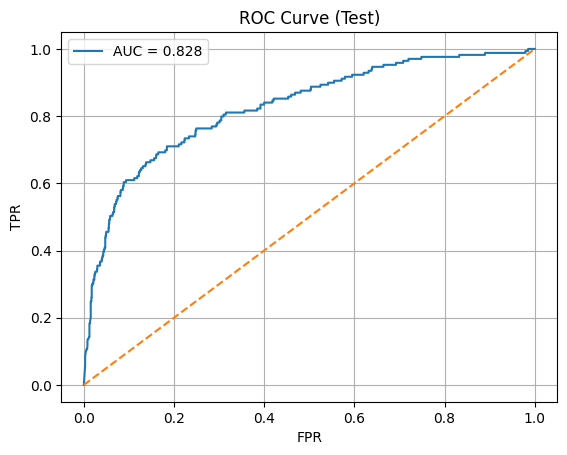

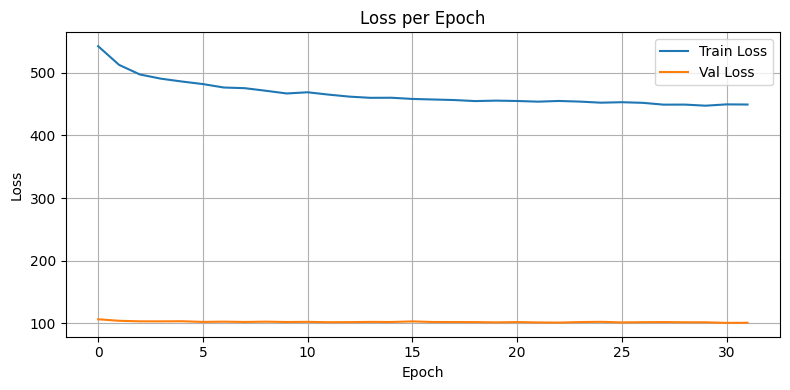

In [46]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === 1. Prepare Data ===
dx2 = df[["key", "freq","typeEnc","in_gold"]]

text_terms = dx2["key"].tolist()
numeric_features = dx2[["freq","typeEnc"]].values
labels = dx2["in_gold"].values

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

X_tensor = torch.cat((text_embeddings, torch.tensor(numeric_features_scaled, dtype=torch.float32)), dim=1)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === 2. Dataset and DataLoader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TermDataset(X_tensor, y_tensor)

'''# Split into train/val/test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)'''

# === 3. Model ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model3 = HybridClassifier(X_tensor.shape[1])

# Weighted loss to handle imbalance
pos_weight = torch.tensor([(len(labels) - labels.sum()) / labels.sum()], dtype=torch.float32)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#loss_fn = FocalLoss(alpha=0.90, gamma=0)   # FOCAL LOSS NE MARCHE PAS. INCAPABLE DE PREDIRE LABEL 1
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)

# === 4. Training with Early Stopping ===
train_losses, val_losses, val_aucs = [], [], []
best_auc = 0
patience = 20
patience_counter = 0

for epoch in range(100):
    # --- Train ---
    model3.train()
    total_train_loss = 0
    for xb, yb in train_dl:
        logits = model3(xb)
        loss = loss_fn(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    train_losses.append(total_train_loss)

    # --- Validate ---
    model3.eval()
    all_probs, all_labels = [], []
    total_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            logits = model3(xb)
            loss = loss_fn(logits, yb)
            total_val_loss += loss.item()
            all_probs.extend(logits.sigmoid().cpu().numpy())
            all_labels.extend(yb.cpu().numpy())
    val_losses.append(total_val_loss)
    auc = roc_auc_score(all_labels, all_probs)
    val_aucs.append(auc)
    
    print(f"Epoch {epoch+1} | Train Loss: {total_train_loss:.2f} | Val Loss: {total_val_loss:.2f} | Val AUC: {auc:.3f}")

    if auc > best_auc:
        best_auc = auc
        best_model_state = model3.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

# Load best model
model3.load_state_dict(best_model_state)

# === 5. Final Evaluation ===
def evaluate_model3(model3, dataloader, name="Set"):
    model3.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in dataloader:
            probs = model3(xb).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(yb.cpu().numpy().flatten())
    preds = (np.array(all_probs) > 0.5).astype(int) # THRESHOLD ?
    print(f"\n📊 Classification Report ({name}):")
    print(classification_report(all_labels, preds, digits=3))
    print("🧮 Confusion Matrix:")
    print(confusion_matrix(all_labels, preds))
    auc = roc_auc_score(all_labels, all_probs)
    print(f"🔵 ROC AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC Curve ({name})")
    plt.legend(); plt.grid(True)
    plt.show()

evaluate_model3(model3, train_dl, name="Train")
evaluate_model3(model3, test_dl, name="Test")

# === 6. Plot Loss Curves ===
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

prediction rewrite

In [131]:
def predict_term(model, term, numeric_stats, scaler, bert_model, threshold=0.5,verbose=False):
    
    model.eval()
    
    # Handle numeric input
    if isinstance(numeric_stats, dict):
        feature_order = ["freq","typeEnc"]
        numeric_array = np.array([[numeric_stats[f] for f in feature_order]])
    else:
        numeric_array = np.array([numeric_stats])  # Assume list in correct order

    numeric_scaled = scaler.transform(numeric_array)
    numeric_tensor = torch.tensor(numeric_scaled, dtype=torch.float32)

    # Handle text embedding
    with torch.no_grad():
        text_embedding = bert_model.encode([term], convert_to_tensor=True)  # shape [1, 384]

    input_tensor = torch.cat((text_embedding, numeric_tensor), dim=1)  # shape [1, D]
    
    with torch.no_grad():
        prob = model(input_tensor).item()
        label = int(prob > threshold)
    
    if verbose == True :
        print(f"🔍 Term: '{term}'")
        print(f"→ Probability of being a concept: {prob:.4f}")
        print(f"→ Predicted label: {label} ({'CONCEPT' if label else 'NOISE'})")
    
    return prob, label


##### prediction running

In [ ]:
def mean_printer(col) :
    nums = col.to_list()
    mean = sum(nums) / len(nums)
    print(mean)

mean_printer(df["dFreq"])
mean_printer(df["spec"])
mean_printer(df["freq"])
mean_printer(df["iFreq"])
mean_printer(df["ind"])
mean_printer(df["tfIdf"])
mean_printer(df["swtSize"])

44.477385952915895
1.9677122203770636
69.01455504542346
25.09231220084009
0.4630262772296571
1.7252085571944904
1.6433525446908275


In [52]:
dy = pd.read_csv("mathsAppHAL.tsv",sep="\t",encoding="latin1")

dy['typeEnc'] = encoder.transform(dy[['type']])
dy

,#,type,key,freq,typeEnc
0,1,T,a: linear,2621,0.0
1,2,T,a: optimal,2344,0.0
2,3,T,n: algorithm,1856,0.0
3,4,T,n: infinity,729,0.0
4,5,T,a: periodic,1422,0.0
...,...,...,...,...,...
93299,77274,T,n: money,3,0.0
93300,77275,T,n: england,2,0.0
93301,77276,T,n: night,4,0.0
93302,77277,T,n: britain,2,0.0


In [ ]:
#dx = pd.read_csv("mathsAppHAL.tsv",sep="\t",encoding="latin1")

good_terms = []
all_probs = []
all_labels = []
good_idx = []

for idx,row in dy.iterrows():
    _,term = re.split(":",row["key"])
    term=term.strip()
    freq = row["freq"]
    typeEnc = row["typeEnc"]
    
    #Perdictions
    proba,label = predict_pipeline(
        model,
        model3,
        term = term,
        numeric_stats={
            "freq": freq, # 200
            "typeEnc" : typeEnc
        },
        scaler=scaler,
        bert_model=bert_model
    )

    all_probs.append(proba)
    all_labels.append(label)
    if label == 1 :
        print("good one on : ",idx)
        good_idx.append(idx)
        good_terms.append(term)

print(len(good_terms))
print(good_terms)

NameError: name 'dy' is not defined

In [150]:
confiances = []
for i in good_idx:
    confiances.append(all_probs[i])

dx_preds = pd.DataFrame({"key" : good_terms, "confiance" : confiances})
dx_preds.to_csv("predictions2.csv")

In [ ]:
# === 8. Evaluation ===
model.eval()
with torch.no_grad():
    preds = model(X_test)
    pred_labels = (preds > 0.5).float()
    acc = (pred_labels == y_test).float().mean()
    print(f"\nTest Accuracy: {acc:.2%}")

In [ ]:
good_terms = []
all_probs = []
all_labels = []
good_idx = []

for idx,row in dy.iterrows():
    _,term = re.split(":",row["key"])
    term=term.strip()
    freq = row["freq"]
    #typeEnc = row["typeEnc"]


    proba,label = predict_term(
        model3,
        term="Advanced",
        numeric_stats={
            "dFreq": 44.47, # 85
            "spec": 1.9677, # 4
            "freq": freq, # 200
            "iFreq": 25.09, # 80
            "ind": 0.4630, # 0.3
            "tfIdf": 1.7252, # 2.5  / Frequency good, offset by term-number and idf
            "swtSize":1.64 # 1 to 3 ?
        },
        scaler=scaler,
        bert_model=bert_model,
        threshold=0.143 #depend on model, 0.5 to 0.95
    )

    all_probs.append(proba)
    all_labels.append(label)
    if label == 1 :
        print("good one on : ",idx)
        good_idx.append(idx)
        good_terms.append(term)

print(len(good_terms))
print(good_terms)


#print("\nProbability : ",proba, ". Label : ", label)

good one on :  0
good one on :  61
good one on :  1943
good one on :  4195
good one on :  12364
good one on :  14133
good one on :  15404
good one on :  15406
good one on :  17329
good one on :  17384
good one on :  44187
good one on :  71076
good one on :  71448
good one on :  74485
good one on :  74916
good one on :  74947
good one on :  75001
good one on :  89472
good one on :  89542
good one on :  89672
good one on :  89777
good one on :  90449
good one on :  90673
23
['linear', 'asymptotic', 'convergence', 'domain', 'solution', 'wave', 'model', 'stability', 'existence', 'method', 'space', 'potential', 'paper', 'application', 'result', 'approach', 'study', 'control', 'order', 'scheme', 'case', 'work', 'time']

Probability :  3.337982310019949e-18 . Label :  0


In [57]:
confiances = []
for i in good_idx:
    confiances.append(all_probs[i])

dx_preds = pd.DataFrame({"key" : good_terms, "confiance" : confiances})
dx_preds.to_csv("predictions3.csv")

# Final Evaluation

In [13]:
# Data :
dev = pd.read_csv("p66_ts_1k.tsv", sep="\t")
#print(dev.head())
#print(len(dev))

p66 = pd.read_csv("../P66.csv")
#print(p66.head())
#print(len(p66))

hidden = p66[["hiddenLabel_en"]]
alternative = p66[["altLabel_en"]]
prefered = p66["prefLabel_en"]

import re

gold = []
gold.extend(prefered)

for text in hidden["hiddenLabel_en"] :
    x = re.split("§§", str(text))
    if x != ["nan"] :
        
        gold.extend(x)

for text in alternative["altLabel_en"] :
    x = re.split("§§", str(text))
    if x != ["nan"] :
    
        gold.extend(x)

print(gold)
print(len(gold))

['quality', 'material entity', 'process', 'phenomenon', 'information entity', 'disposition', 'cognitive quality', 'object', 'biological material entity', 'developmental process', 'planned process', 'neurophysiological process', 'cognitive process', 'emotion process', 'memory phenomenon', 'metamemory phenomenon', 'learning phenomenon', 'attention phenomenon', 'data', 'format', 'theoretical entity', 'mathematical function', 'algorithm', 'graph', 'software', 'measure', 'cue', 'cognitive disorder', 'cognition', 'affordance', 'study method', 'scientific law', 'study method of memory', 'aging', 'child development', 'theory', 'memory aging', 'principle', 'cognitive aging', 'non-computational model', 'infant development', 'model', 'memory strength', 'memory organization', 'emotional arousal', 'emotional valence', 'mnemicity', 'phenomenological characteristic of memory', 'typicality', 'cognitive economy', 'basic level', 'episodicity', 'stimulus', 'anatomical entity', 'neurotrophin', 'transcript

In [14]:
import re

terms = dev[["key"]]
splited_terms = []
splited_pos = []

for t in terms["key"] :
    splitrez=re.split(": ", t)
    splited_pos.append(splitrez[0])
    splited_terms.append(splitrez[1])

dev["key_processed"]=splited_terms
dev["key_processed"]

dev["pos"]=splited_pos

dev["in_gold"] = dev["key_processed"].isin(gold).astype(int)

#dev["in_gold"]

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
dev['typeEnc'] = encoder.fit_transform(dev[['type']])
#encoder.categories_

dev['posEnc'] = encoder.fit_transform(dev[['pos']])
dev

,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isSem,isDistrib,semSim,isDico,semScore,key_processed,pos,in_gold,typeEnc,posEnc
0,1,T,1,1.0,572,1.01,0.0,4.46,6212,1.0,...,NaN,NaN,NaN,NaN,NaN,spatial,a,0,0.0,0.0
1,2,T,2,1.0,532,0.98,0.0,4.45,6054,1.0,...,NaN,NaN,NaN,NaN,NaN,activation,n,1,0.0,16.0
2,3,T,3,1.0,463,0.76,0.0,4.34,4665,1.0,...,NaN,NaN,NaN,NaN,NaN,retrieval,n,1,0.0,16.0
3,4,T,4,1.0,441,0.70,0.0,4.30,4297,1.0,...,NaN,NaN,NaN,NaN,NaN,hippocampus,n,1,0.0,16.0
4,5,T,5,1.0,342,0.53,0.0,4.18,3237,1.0,...,NaN,NaN,NaN,NaN,NaN,neuron,n,1,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151996,117911,T,117911,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,item-specific and relational processing,ncan,0,0.0,20.0
151997,117912,T,117912,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,statistical outcome,an,0,0.0,8.0
151998,117913,T,117913,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,efficient access,an,0,0.0,8.0
151999,117914,T,117914,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,final regression,an,0,0.0,8.0


In [15]:
seuil = 5

dev_x = pd.DataFrame([row for i,row in dev.iterrows() if row["freq"]>seuil ])
print(len([x for x in dev_x["in_gold"] if x==1]))
dev_x

850


,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isSem,isDistrib,semSim,isDico,semScore,key_processed,pos,in_gold,typeEnc,posEnc
0,1,T,1,1.0,572,1.01,0.0,4.46,6212,1.0,...,NaN,NaN,NaN,NaN,NaN,spatial,a,0,0.0,0.0
1,2,T,2,1.0,532,0.98,0.0,4.45,6054,1.0,...,NaN,NaN,NaN,NaN,NaN,activation,n,1,0.0,16.0
2,3,T,3,1.0,463,0.76,0.0,4.34,4665,1.0,...,NaN,NaN,NaN,NaN,NaN,retrieval,n,1,0.0,16.0
3,4,T,4,1.0,441,0.70,0.0,4.30,4297,1.0,...,NaN,NaN,NaN,NaN,NaN,hippocampus,n,1,0.0,16.0
4,5,T,5,1.0,342,0.53,0.0,4.18,3237,1.0,...,NaN,NaN,NaN,NaN,NaN,neuron,n,1,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151589,117533,V[s]+,10976,NaN,9,0.00,0.0,1.79,13,1.0,...,0.0,NaN,NaN,NaN,NaN,language difficulty,nn,0,27.0,23.0
151666,117604,V[sg]+,13681,NaN,2,0.00,0.0,1.68,10,1.0,...,0.0,NaN,NaN,NaN,NaN,dmn node,nn,0,29.0,23.0
151826,117754,V[m]+,13466,NaN,2,0.00,0.0,1.68,10,1.0,...,0.0,NaN,NaN,NaN,NaN,non-articulatory maintenance,an,0,21.0,8.0
151937,117854,V[mg]+,10895,NaN,12,0.00,0.0,1.79,26,1.0,...,0.0,NaN,NaN,NaN,NaN,motor neuron,nn,0,23.0,23.0


In [16]:
!pip install torch scikit-learn pandas sentence-transformers --quiet

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


2025-08-25 15:45:54.712927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756129554.805753   24499 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756129554.850457   24499 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756129555.079556   24499 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756129555.079610   24499 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756129555.079614   24499 computation_placer.cc:177] computation placer alr

In [17]:
#len([row for i,row in dev_x.iterrows() if row["in_gold"]==1]) #Seuil >5 : 42114 total, 850 gold.




# === 1. Prepare Data ===
dev2 = dev_x[["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize", "in_gold"]]

text_terms = dev2["key"].tolist()
numeric_features = dev2[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values
labels = dev2["in_gold"].values

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

X_tensor = torch.cat((text_embeddings, torch.tensor(numeric_features_scaled, dtype=torch.float32)), dim=1)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === 2. Dataset and DataLoader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TermDataset(X_tensor, y_tensor)
test_dl = DataLoader(dataset, batch_size=16)

class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model3 = HybridClassifier(X_tensor.shape[1])

#EVALUATION
model3.load_state_dict(torch.load("model1_p0937_r0876_th0143.pt"))
model3.eval()

all_probs, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        probs = model3(xb).cpu().numpy().flatten()
        all_probs.extend(probs)
        all_labels.extend(yb.cpu().numpy().flatten())

best_threshold = 0.143

preds = (np.array(all_probs) > best_threshold).astype(int)
print("\n🔁 Evaluation with optimized threshold:")
print(classification_report(all_labels, preds, digits=3))
print(confusion_matrix(all_labels, preds))



🔁 Evaluation with optimized threshold:
              precision    recall  f1-score   support

         0.0      0.983     0.955     0.969     41264
         1.0      0.082     0.194     0.115       850

    accuracy                          0.940     42114
   macro avg      0.532     0.575     0.542     42114
weighted avg      0.965     0.940     0.952     42114

[[39408  1856]
 [  685   165]]


In [46]:
results = pd.DataFrame()
results["term"] = dev_x["key_processed"].to_list()
results["prob"]=all_probs
results["preds"] = preds
results["gold"] = all_labels

results.to_csv("p66_step2_results.csv",sep=";")
results

,term,prob,preds,gold
0,spatial,9.660496e-01,1,0.0
1,activation,9.958010e-01,1,1.0
2,retrieval,7.928092e-01,1,1.0
3,hippocampus,8.296789e-01,1,1.0
4,neuron,9.633147e-01,1,1.0
...,...,...,...,...
42109,language difficulty,3.146672e-05,0,0.0
42110,dmn node,2.303000e-05,0,0.0
42111,non-articulatory maintenance,1.733050e-08,0,0.0
42112,motor neuron,5.132040e-05,0,0.0


In [48]:
res_purged = results[results['preds'] == 1.0].reset_index(drop=True)
res_purged.to_csv("p66_step2_results_purged.csv",sep=";")
res_purged


,term,prob,preds,gold
0,spatial,0.966050,1,0.0
1,activation,0.995801,1,1.0
2,retrieval,0.792809,1,1.0
3,hippocampus,0.829679,1,1.0
4,neuron,0.963315,1,1.0
...,...,...,...,...
2016,memory span,0.552102,1,1.0
2017,amygdala neuron,0.982739,1,0.0
2018,gamma power,0.740255,1,0.0
2019,signal intensity,0.924834,1,0.0


# Scalling

In [43]:
import re
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def dataprocesseur(path_TS_extraction, path_termino_csv, threshold=-1, verbose=False) :
    '''
    require pandas as pd, re, OrdinalEncoder from sklearn.preprocessing
    get a .tsv file containing Termsuite extractions with at least those values : ["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"].
    turn it into a pandas dataset and process it
    also require a terminology in csv format for gold gathering
    you can define a threshold of frequency with threshold
    verbose if you want print as it goes along'''

    dataset = pd.read_csv(path_TS_extraction, sep="\t")
    gold_dataset = pd.read_csv(path_termino_csv)
    
    #STEP 1 Gather the gold list
    hidden = gold_dataset[["hiddenLabel_en"]]
    alternative = gold_dataset[["altLabel_en"]]
    prefered = gold_dataset["prefLabel_en"]
    gold = []
    gold.extend(prefered)
    for text in hidden["hiddenLabel_en"] :
        x = re.split("§§", str(text))
        if x != ["nan"] :
            gold.extend(x)
    for text in alternative["altLabel_en"] :
        x = re.split("§§", str(text))
        if x != ["nan"] :
            gold.extend(x)
    #prints
    if verbose == True :
        print(gold)
        print(len(gold))
    
    #STEP 2 get the new usefull columns
    # Key without the pos tag
    terms = dataset[["key"]]
    splited_terms = []
    splited_pos = []
    for t in terms["key"] :
        splitrez=re.split(": ", t)
        splited_pos.append(splitrez[0])
        splited_terms.append(splitrez[1])
    dataset["key_processed"]=splited_terms
    dataset["key_processed"]
    #pos tag on it's own
    dataset["pos"]=splited_pos
    #classify if term is gold or not
    dataset["in_gold"] = dataset["key_processed"].isin(gold).astype(int)
    #Encode "type" and "pos"
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    '''dataset['typeEnc'] = encoder.fit_transform(dataset[['type']])''' #TYPE NOT REQUIRED NOW
    dataset['posEnc'] = encoder.fit_transform(dataset[['pos']])
    
    #RETURN
    return dataset


In [100]:
dev = dataprocesseur("p66_ts_1k.tsv","../P66.csv",threshold=5)
dev

,#,type,rank,isSwt,dFreq,fNorm,gfNorm,spec,freq,ortho,...,isMorph,isSem,isDistrib,semSim,isDico,semScore,key_processed,pos,in_gold,posEnc
0,1,T,1,1.0,572,1.01,0.0,4.46,6212,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,spatial,a,0,0.0
1,2,T,2,1.0,532,0.98,0.0,4.45,6054,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,activation,n,1,16.0
2,3,T,3,1.0,463,0.76,0.0,4.34,4665,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,retrieval,n,1,16.0
3,4,T,4,1.0,441,0.70,0.0,4.30,4297,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,hippocampus,n,1,16.0
4,5,T,5,1.0,342,0.53,0.0,4.18,3237,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,neuron,n,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151996,117911,T,117911,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,item-specific and relational processing,ncan,0,20.0
151997,117912,T,117912,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,statistical outcome,an,0,8.0
151998,117913,T,117913,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,efficient access,an,0,8.0
151999,117914,T,117914,NaN,1,0.00,0.0,0.00,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,final regression,an,0,8.0


In [ ]:
def mean_printer(col) :
    nums = col.to_list()
    mean = sum(nums) / len(nums)
    print(mean)

'''from sklearn.preprocessing import StandardScaler

# Fit only on training numeric features
scaler = StandardScaler()
freq = scaler.fit_transform(df["freq"].to_list())
# Transform others using the same scaler
dFreq = scaler.transform(df["dFreq"].to_list())
print(freq)
print(dFreq)'''


mean_printer(df["dFreq"])
mean_printer(df["spec"])
mean_printer(df["freq"])
mean_printer(df["iFreq"])
mean_printer(df["ind"])
mean_printer(df["tfIdf"])
mean_printer(df["swtSize"])
print("____")
mean_printer(dev_x["dFreq"])
mean_printer(dev_x["spec"])
mean_printer(dev_x["freq"])
mean_printer(dev_x["iFreq"])
mean_printer(dev_x["ind"])
mean_printer(dev_x["tfIdf"])
mean_printer(dev_x["swtSize"])
print("_______max______")
print(f"dFreq, df : {max(df["dFreq"])}, dev : {max(dev_x["dFreq"])}")
print(f"spec, df : {max(df["spec"])}, dev : {max(dev_x["spec"])}")
print(f"freq, df : {max(df["freq"])}, dev : {max(dev_x["freq"])}")
print(f"iFreq, df : {max(df["iFreq"])}, dev : {max(dev_x["iFreq"])}")
print(f"ind, df : {max(df["ind"])}, dev : {max(dev_x["ind"])}")
print(f"tfIdf, df : {max(df["tfIdf"])}, dev : {max(dev_x["tfIdf"])}")
print(f"swtSize, df : {max(df["swtSize"])}, dev : {max(dev_x["swtSize"])}")
print("_______min______")
print(f"dFreq, df : {min(df["dFreq"])}, dev : {min(dev_x["dFreq"])}")
print(f"spec, df : {min(df["spec"])}, dev : {min(dev_x["spec"])}")
print(f"freq, df : {min(df["freq"])}, dev : {min(dev_x["freq"])}")
print(f"iFreq, df : {min(df["iFreq"])}, dev : {min(dev_x["iFreq"])}")
print(f"ind, df : {min(df["ind"])}, dev : {min(dev_x["ind"])}")
print(f"tfIdf, df : {min(df["tfIdf"])}, dev : {min(dev_x["tfIdf"])}")
print(f"swtSize, df : {min(df["swtSize"])}, dev : {min(dev_x["swtSize"])}")

#swtSize, ind and spec already scaled

6.3648257567677436e-18
1.6780369721685993
-4.624454022838624e-18
3.1102426955468135e-18
0.6782985387555772
-1.0519683752058656e-16
2.1547538384832716
____
0.18720157876778987
1.5996887020943154
0.586150451081129
0.7171313878277727
0.743281331623688
2.7948506305041163
1.9564990264520112
_______max______
dFreq, df : 138.6185814329773, dev : 18.961720540214078
spec, df : 4.6, dev : 4.46
freq, df : 85.516171497294, dev : 586.5963880588845
iFreq, df : 200.1345280746788, dev : 253.9450184159176
ind, df : 1.0, dev : 1.0
tfIdf, df : 43.92532838574544, dev : 360.31176007697746
swtSize, df : 5, dev : 5
_______min______
dFreq, df : -0.1320519165856887, dev : -0.1320519165856887
spec, df : 0.0, dev : 0.0
freq, df : -0.11728582155164285, dev : -0.07008534900439432
iFreq, df : -0.1155932413832551, dev : -0.1155932413832551
ind, df : 0.1, dev : 0.1
tfIdf, df : -0.6799718199036628, dev : -0.6799718199036628
swtSize, df : 1, dev : 1


In [33]:
from sklearn.preprocessing import StandardScaler

def standard_scale_columns(df, columns):
    """
    Standard scale selected columns in a pandas DataFrame.
    
    Parameters:
    - df: pd.DataFrame
    - columns: list of column names to scale
    
    Returns:
    - scaled_df: new DataFrame with scaled columns
    - scaler: fitted StandardScaler object
    """
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[columns])
    
    scaled_df = df.copy()
    scaled_df[columns] = scaled_values
    
    return scaled_df, scaler

def apply_scaler_to_columns(df, columns, scaler):
    scaled_df = df.copy()
    scaled_df[columns] = scaler.transform(df[columns])
    return scaled_df


# Example DataFrame

columns_to_scale = ["dFreq", "freq", "iFreq", "tfIdf"]
df, scaler = standard_scale_columns(df, columns_to_scale)
#df.head()

In [ ]:
dev_x = apply_scaler_to_columns(dev_x,columns_to_scale,scaler)
#dev_x.head()

### Model 3 with scalling. Test séparation pos et key (non concluant)

Epoch 1 | Train Loss: 4109.90 | Val Loss: 836.90 | Val AUC: 0.894
Epoch 2 | Train Loss: 4003.92 | Val Loss: 833.26 | Val AUC: 0.900
Epoch 3 | Train Loss: 3995.23 | Val Loss: 825.04 | Val AUC: 0.894
Epoch 4 | Train Loss: 3983.36 | Val Loss: 823.12 | Val AUC: 0.896
Epoch 5 | Train Loss: 3968.61 | Val Loss: 822.96 | Val AUC: 0.901
Epoch 6 | Train Loss: 3954.77 | Val Loss: 825.89 | Val AUC: 0.900
Epoch 7 | Train Loss: 3929.90 | Val Loss: 833.45 | Val AUC: 0.871
Epoch 8 | Train Loss: 3938.53 | Val Loss: 822.00 | Val AUC: 0.893
Epoch 9 | Train Loss: 3917.96 | Val Loss: 819.87 | Val AUC: 0.900
Epoch 10 | Train Loss: 3906.29 | Val Loss: 819.25 | Val AUC: 0.899
Epoch 11 | Train Loss: 3910.22 | Val Loss: 819.18 | Val AUC: 0.907
Epoch 12 | Train Loss: 3890.66 | Val Loss: 815.94 | Val AUC: 0.905
Epoch 13 | Train Loss: 3882.67 | Val Loss: 814.38 | Val AUC: 0.903
Epoch 14 | Train Loss: 3867.40 | Val Loss: 817.04 | Val AUC: 0.892
Epoch 15 | Train Loss: 3876.84 | Val Loss: 828.46 | Val AUC: 0.879
Epoc

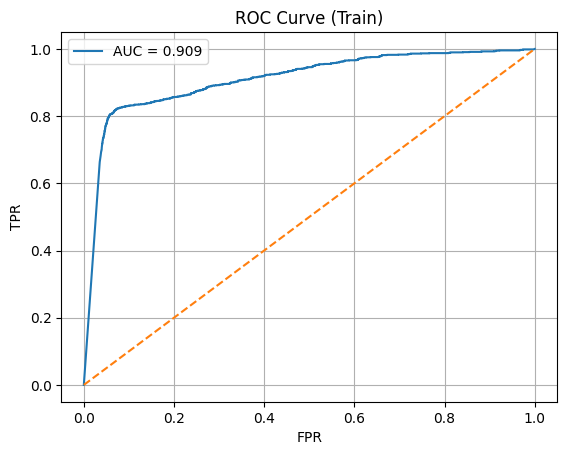


📊 Classification Report (Test):
              precision    recall  f1-score   support

         0.0      0.992     0.946     0.968     11472
         1.0      0.217     0.649     0.325       262

    accuracy                          0.940     11734
   macro avg      0.604     0.798     0.647     11734
weighted avg      0.974     0.940     0.954     11734

🧮 Confusion Matrix:
[[10857   615]
 [   92   170]]
🔵 ROC AUC: 0.884


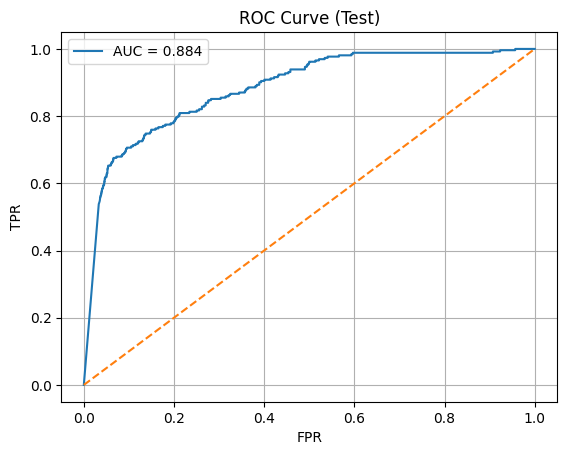

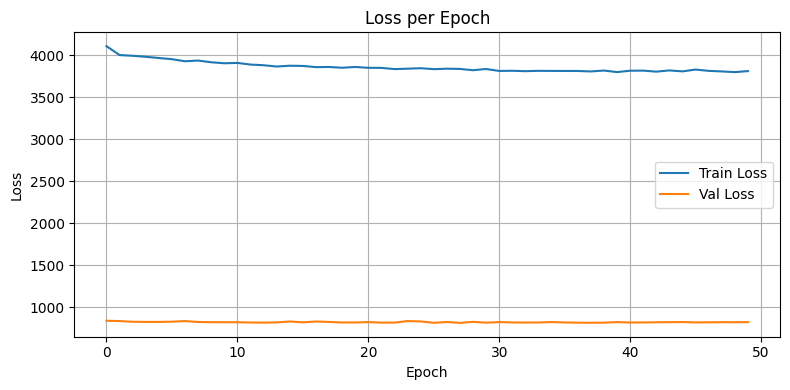

In [80]:
#!pip install torch scikit-learn pandas sentence-transformers --quiet

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === 1. Prepare Data ===
dx = df[["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize", "in_gold"]]

text_terms = dx["key"].tolist()
numeric_features = dx[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values
labels = dx["in_gold"].values

#Scaler
'''columns_to_scale = ["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]
dx, scaler = standard_scale_columns(dx, columns_to_scale)
numeric_features_scaled = dx[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values'''

scaler = StandardScaler()
numeric_features_scaled =  scaler.fit_transform(numeric_features)

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

X_tensor = torch.cat((text_embeddings, torch.tensor(numeric_features_scaled, dtype=torch.float32)), dim=1)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === 2. Dataset and DataLoader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TermDataset(X_tensor, y_tensor)

# Split into train/val/test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16)
test_dl = DataLoader(test_ds, batch_size=16)

# === 3. Model ===
class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model3 = HybridClassifier(X_tensor.shape[1])

# Weighted loss to handle imbalance
pos_weight = torch.tensor([(len(labels) - labels.sum()) / labels.sum()], dtype=torch.float32)
loss_fn = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#loss_fn = FocalLoss(alpha=0.90, gamma=0)   # FOCAL LOSS NE MARCHE PAS. INCAPABLE DE PREDIRE LABEL 1
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)

# === 4. Training with Early Stopping ===
train_losses, val_losses, val_aucs = [], [], []
best_auc = 0
patience = 30
patience_counter = 0

for epoch in range(50):
    # --- Train ---
    model3.train()
    total_train_loss = 0
    for xb, yb in train_dl:
        logits = model3(xb)
        loss = loss_fn(logits, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    train_losses.append(total_train_loss)

    # --- Validate ---
    model3.eval()
    all_probs, all_labels = [], []
    total_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_dl:
            logits = model3(xb)
            loss = loss_fn(logits, yb)
            total_val_loss += loss.item()
            all_probs.extend(logits.sigmoid().cpu().numpy())
            all_labels.extend(yb.cpu().numpy())
    val_losses.append(total_val_loss)
    auc = roc_auc_score(all_labels, all_probs)
    val_aucs.append(auc)
    
    print(f"Epoch {epoch+1} | Train Loss: {total_train_loss:.2f} | Val Loss: {total_val_loss:.2f} | Val AUC: {auc:.3f}")

    if auc > best_auc:
        best_auc = auc
        best_model_state = model3.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

# Load best model
model3.load_state_dict(best_model_state)

# === 5. Final Evaluation ===
def evaluate_model3(model3, dataloader, name="Set"):
    model3.eval()
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in dataloader:
            probs = model3(xb).cpu().numpy().flatten()
            all_probs.extend(probs)
            all_labels.extend(yb.cpu().numpy().flatten())
    preds = (np.array(all_probs) > 0.5).astype(int) # THRESHOLD ?
    print(f"\n📊 Classification Report ({name}):")
    print(classification_report(all_labels, preds, digits=3))
    print("🧮 Confusion Matrix:")
    print(confusion_matrix(all_labels, preds))
    auc = roc_auc_score(all_labels, all_probs)
    print(f"🔵 ROC AUC: {auc:.3f}")
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC Curve ({name})")
    plt.legend(); plt.grid(True)
    plt.show()

evaluate_model3(model3, train_dl, name="Train")
evaluate_model3(model3, test_dl, name="Test")

# === 6. Plot Loss Curves ===
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Optimal threshold for best F1: 0.002 | F1: 0.522


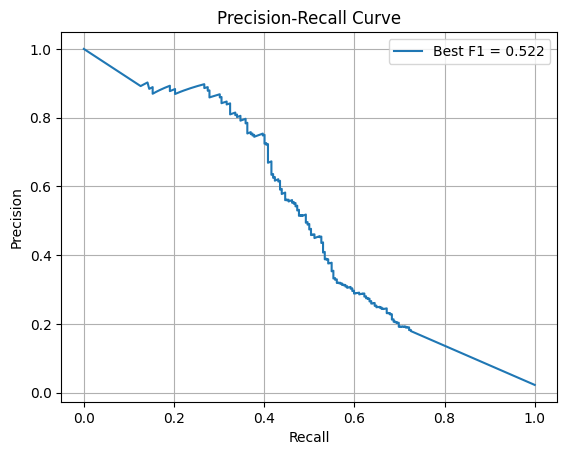


🔁 Evaluation with optimized threshold:
              precision    recall  f1-score   support

         0.0      0.986     0.997     0.992     11472
         1.0      0.748     0.397     0.519       262

    accuracy                          0.984     11734
   macro avg      0.867     0.697     0.755     11734
weighted avg      0.981     0.984     0.981     11734

[[11437    35]
 [  158   104]]


In [99]:
### THRESHOLD

from sklearn.metrics import precision_recall_curve

def optimize_threshold(probs, labels):
    precisions, recalls, thresholds = precision_recall_curve(labels, probs)

    # Add one more threshold to match len(precisions)
    thresholds = np.append(thresholds, 1.0)

    f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1s)
    best_threshold = thresholds[best_idx]

    print(f"🔍 Optimal threshold for best F1: {best_threshold:.3f} | F1: {f1s[best_idx]:.3f}")
    
    # PR Curve
    plt.figure()
    plt.plot(recalls, precisions, label=f"Best F1 = {f1s[best_idx]:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.legend()
    plt.show()

    return best_threshold

# Get probs/labels from test set
model.eval() #Model 3 is with weighted loss
all_probs, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        probs = model(xb).cpu().numpy().flatten()
        all_probs.extend(probs)
        all_labels.extend(yb.cpu().numpy().flatten())

# Find the best threshold
best_thresh = optimize_threshold(np.array(all_probs), np.array(all_labels))

# Re-evaluate with new threshold
preds = (np.array(all_probs) > best_thresh).astype(int)
print("\n🔁 Evaluation with optimized threshold:")
print(classification_report(all_labels, preds, digits=3))
print(confusion_matrix(all_labels, preds))


# LAST eval ?

In [1]:
#len([row for i,row in dev.iterrows() if row["in_gold"]==1]) #Seuil >5 : 42114 total, 1068 gold.


# === 1. Prepare Data ===
dev2 = dev[["key", "dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize", "in_gold"]]

text_terms = dev2["key"].tolist()
numeric_features = dev2[["dFreq", "spec", "freq", "iFreq", "ind", "tfIdf", "swtSize"]].values
labels = dev2["in_gold"].values

#scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    text_embeddings = bert_model.encode(text_terms, convert_to_tensor=True)

X_tensor = torch.cat((text_embeddings, torch.tensor(numeric_features_scaled, dtype=torch.float32)), dim=1)
y_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# === 2. Dataset and DataLoader ===
class TermDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TermDataset(X_tensor, y_tensor)
test_dl = DataLoader(dataset, batch_size=16)

class HybridClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

'''model3 = HybridClassifier(X_tensor.shape[1])

#EVALUATION
model3.load_state_dict(torch.load("model3_p0937_r0876_th0143.pt"))
model3.eval()'''

model.eval()

all_probs, all_labels = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        probs = model3(xb).cpu().numpy().flatten()
        all_probs.extend(probs)
        all_labels.extend(yb.cpu().numpy().flatten())

best_threshold = 0.143

preds = (np.array(all_probs) > best_threshold).astype(int)
print("\n🔁 Evaluation with optimized threshold:")
print(classification_report(all_labels, preds, digits=3))
print(confusion_matrix(all_labels, preds))


NameError: name 'dev' is not defined

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/a_medjaed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/a_medjaed/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True